In [1]:
!pip install folium

In [2]:
#import ray


import time
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly_express as px
import tensorflow as tf
import folium

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
#import dataset
db = pd.read_csv("tracklets.csv")
db

,idtracklet|id1|mmsi1|speed1|course1|heading1|lon1|lat1|ts1|id2|mmsi2|speed2|course2|heading2|lon2|lat2|ts2|id3|mmsi3|speed3|course3|heading3|lon3|lat3|ts3|id4|mmsi4|speed4|course4|heading4|lon4|lat4|ts4|id5|mmsi5|speed5|course5|heading5|lon5|lat5|ts5|route
0,1|4128997|228005700|6.7|175|511|-4.551695|48.3...
1,2|14817869|249104000|8.7|69|69|-4.733975|48.30...
2,3|8618319|228017700|14.6|83.7|86|-4.885512|48....
3,4|16024159|227008170|12.3|125|126|-4.924165|48...
4,5|2144526|228017700|16.5|73.4|73|-4.550415|48....
...,...
795,796|3554186|227730220|19.1|56.9|511|-4.639665|...
796,797|1585479|227005550|23.1|68.9|511|-4.547798|...
797,798|2761022|258316000|12.1|338|332|-5.186498|4...
798,799|5167729|228186700|10.9|104|103|-4.465165|4...


In [4]:
#re-import dataset and set delimiter
db = pd.read_csv("tracklets.csv", sep="|")
db

,idtracklet,id1,mmsi1,speed1,course1,heading1,lon1,lat1,ts1,id2,...,ts4,id5,mmsi5,speed5,course5,heading5,lon5,lat5,ts5,route
0,1,4128997,228005700,6.7,175.0,511,-4.551695,48.344520,1447148032,4129047,...,1447148121,4129188,228005700,3.9,325.8,511,-4.551893,48.343353,1447148153,R_07
1,2,14817869,249104000,8.7,69.0,69,-4.733975,48.301247,1456438812,14817884,...,1456438842,14817927,249104000,8.5,68.5,69,-4.731818,48.301840,1456438851,R_14
2,3,8618319,228017700,14.6,83.7,86,-4.885512,48.404390,1451215056,8618323,...,1451215075,8618335,228017700,14.7,84.3,88,-4.882973,48.404560,1451215081,R_01
3,4,16024159,227008170,12.3,125.0,126,-4.924165,48.405033,1457099514,16024163,...,1457099527,16024186,227008170,12.4,130.0,119,-4.922998,48.404335,1457099531,R_11
4,5,2144526,228017700,16.5,73.4,73,-4.550415,48.351140,1445447976,2144611,...,1445448112,2144738,228017700,16.0,72.7,71,-4.535050,48.354515,1445448122,R_06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,3554186,227730220,19.1,56.9,511,-4.639665,48.315987,1446681907,3554191,...,1446681925,3554214,227730220,19.5,55.2,511,-4.636951,48.317173,1446681932,R_0
796,797,1585479,227005550,23.1,68.9,511,-4.547798,48.351620,1444922333,1585481,...,1444922338,1585485,227005550,23.2,69.3,511,-4.547202,48.351772,1444922338,R_0
797,798,2761022,258316000,12.1,338.0,332,-5.186498,48.084835,1445959658,2761038,...,1445959718,2761117,258316000,12.2,337.0,333,-5.188832,48.088500,1445959727,R_0
798,799,5167729,228186700,10.9,104.0,103,-4.465165,48.318333,1448009887,5167735,...,1448009892,5167744,228186700,10.9,105.0,101,-4.464665,48.318165,1448009893,R_0


In [5]:
#examine dataset
print("---cc---")
print(db.info())

---cc---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   idtracklet  800 non-null    int64  
 1   id1         800 non-null    int64  
 2   mmsi1       800 non-null    int64  
 3   speed1      800 non-null    float64
 4   course1     800 non-null    float64
 5   heading1    800 non-null    int64  
 6   lon1        800 non-null    float64
 7   lat1        800 non-null    float64
 8   ts1         800 non-null    int64  
 9   id2         800 non-null    int64  
 10  mmsi2       800 non-null    int64  
 11  speed2      800 non-null    float64
 12  course2     800 non-null    float64
 13  heading2    800 non-null    int64  
 14  lon2        800 non-null    float64
 15  lat2        800 non-null    float64
 16  ts2         800 non-null    int64  
 17  id3         800 non-null    int64  
 18  mmsi3       800 non-null    int64  
 19  speed3      800 non-

In [6]:
print("Tracklets Rows: ", db.shape[0])
print("Tracklets Columns: ", db.shape[1])

Tracklets Rows:  800
Tracklets Columns:  42


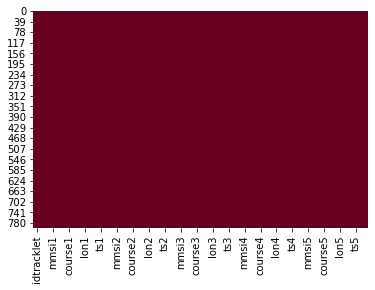

In [7]:
#heatmap to detect null values
sns.heatmap(db.isnull(), cmap="RdBu", cbar=False)

In [8]:
#drop potential na values
db.dropna(inplace=True)
db

,idtracklet,id1,mmsi1,speed1,course1,heading1,lon1,lat1,ts1,id2,...,ts4,id5,mmsi5,speed5,course5,heading5,lon5,lat5,ts5,route
0,1,4128997,228005700,6.7,175.0,511,-4.551695,48.344520,1447148032,4129047,...,1447148121,4129188,228005700,3.9,325.8,511,-4.551893,48.343353,1447148153,R_07
1,2,14817869,249104000,8.7,69.0,69,-4.733975,48.301247,1456438812,14817884,...,1456438842,14817927,249104000,8.5,68.5,69,-4.731818,48.301840,1456438851,R_14
2,3,8618319,228017700,14.6,83.7,86,-4.885512,48.404390,1451215056,8618323,...,1451215075,8618335,228017700,14.7,84.3,88,-4.882973,48.404560,1451215081,R_01
3,4,16024159,227008170,12.3,125.0,126,-4.924165,48.405033,1457099514,16024163,...,1457099527,16024186,227008170,12.4,130.0,119,-4.922998,48.404335,1457099531,R_11
4,5,2144526,228017700,16.5,73.4,73,-4.550415,48.351140,1445447976,2144611,...,1445448112,2144738,228017700,16.0,72.7,71,-4.535050,48.354515,1445448122,R_06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,3554186,227730220,19.1,56.9,511,-4.639665,48.315987,1446681907,3554191,...,1446681925,3554214,227730220,19.5,55.2,511,-4.636951,48.317173,1446681932,R_0
796,797,1585479,227005550,23.1,68.9,511,-4.547798,48.351620,1444922333,1585481,...,1444922338,1585485,227005550,23.2,69.3,511,-4.547202,48.351772,1444922338,R_0
797,798,2761022,258316000,12.1,338.0,332,-5.186498,48.084835,1445959658,2761038,...,1445959718,2761117,258316000,12.2,337.0,333,-5.188832,48.088500,1445959727,R_0
798,799,5167729,228186700,10.9,104.0,103,-4.465165,48.318333,1448009887,5167735,...,1448009892,5167744,228186700,10.9,105.0,101,-4.464665,48.318165,1448009893,R_0


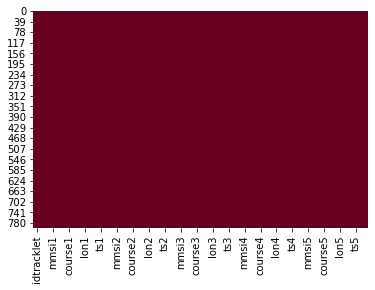

In [9]:
#heatmap to detect null values
sns.heatmap(db.isnull(), cmap="RdBu", cbar=False)

In [10]:
#only needed if you need to read the UNIX timestamps

#process timestamps to human readable format
#db['ts1'] = pd.to_datetime(db['ts1'], unit='s')
#db['ts2'] = pd.to_datetime(db['ts2'], unit='s')
#db['ts3'] = pd.to_datetime(db['ts3'], unit='s')
#db['ts4'] = pd.to_datetime(db['ts4'], unit='s')
#db['ts5'] = pd.to_datetime(db['ts5'], unit='s')
#db

In [11]:
#introduce a correlation matrix
cm = db.corr()

In [12]:
#feature and target selection
features = ['speed1', 'course1', 'heading1', 'ts1', 'speed2', 'course2', 'heading2', 'ts2', 'speed3', 'course3', 'heading3', 'ts3', 'speed4', 'course4', 'heading4', 'ts4', 'speed5', 'course5', 'heading5', 'ts5']  
targets = ['lon1', 'lat1']  

x = db[features]
y = db[targets]

original_lon1 = db["lon1"]
original_lat1 = db["lat1"]

In [13]:
#examine x then y
x

,speed1,course1,heading1,ts1,speed2,course2,heading2,ts2,speed3,course3,heading3,ts3,speed4,course4,heading4,ts4,speed5,course5,heading5,ts5
0,6.7,175.0,511,1447148032,6.9,175.5,511,1447148061,2.8,215.6,511,1447148092,2.1,337.5,511,1447148121,3.9,325.8,511,1447148153
1,8.7,69.0,69,1456438812,8.5,69.1,68,1456438821,8.5,68.3,69,1456438832,8.6,67.9,69,1456438842,8.5,68.5,69,1456438851
2,14.6,83.7,86,1451215056,14.7,83.7,86,1451215063,14.7,83.8,86,1451215069,14.6,84.1,87,1451215075,14.7,84.3,88,1451215081
3,12.3,125.0,126,1457099514,12.6,130.0,125,1457099516,12.8,132.0,124,1457099521,12.5,131.0,121,1457099527,12.4,130.0,119,1457099531
4,16.5,73.4,73,1445447976,16.0,70.3,69,1445448036,15.8,70.5,71,1445448052,16.1,72.8,73,1445448112,16.0,72.7,71,1445448122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,19.1,56.9,511,1446681907,19.5,57.7,511,1446681913,19.9,59.2,511,1446681919,19.0,55.4,511,1446681925,19.5,55.2,511,1446681932
796,23.1,68.9,511,1444922333,23.2,69.1,511,1444922335,23.2,69.3,511,1444922337,23.2,69.7,511,1444922338,23.2,69.3,511,1444922338
797,12.1,338.0,332,1445959658,12.1,338.0,332,1445959667,12.2,338.0,332,1445959677,12.2,337.0,333,1445959718,12.2,337.0,333,1445959727
798,10.9,104.0,103,1448009887,10.9,104.0,102,1448009889,10.9,105.0,102,1448009890,10.9,107.0,101,1448009892,10.9,105.0,101,1448009893


In [14]:
y

,lon1,lat1
0,-4.551695,48.344520
1,-4.733975,48.301247
2,-4.885512,48.404390
3,-4.924165,48.405033
4,-4.550415,48.351140
...,...,...
795,-4.639665,48.315987
796,-4.547798,48.351620
797,-5.186498,48.084835
798,-4.465165,48.318333


In [15]:
#split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import RobustScaler

#scaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
#fit the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(features),)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(2)  # 2 output neurons for longitude and latitude
])

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
model.fit(X_train_scaled, y_train, epochs=10000, batch_size=8, validation_split=0.2)

Epoch 1/10000
64/64 [==============================] - 0s 2ms/step - loss: 1098.6276 - val_loss: 814.1440
Epoch 2/10000
64/64 [==============================] - 0s 984us/step - loss: 422.3736 - val_loss: 123.8456
Epoch 3/10000
64/64 [==============================] - 0s 1ms/step - loss: 131.8772 - val_loss: 59.5994
Epoch 4/10000
64/64 [==============================] - 0s 984us/step - loss: 79.8499 - val_loss: 40.0920
Epoch 5/10000
64/64 [==============================] - 0s 1ms/step - loss: 56.1147 - val_loss: 33.6699
Epoch 6/10000
64/64 [==============================] - 0s 1ms/step - loss: 39.9584 - val_loss: 26.8503
Epoch 7/10000
64/64 [==============================] - 0s 1ms/step - loss: 31.0593 - val_loss: 22.7110
Epoch 8/10000
64/64 [==============================] - 0s 1ms/step - loss: 24.5687 - val_loss: 20.5801
Epoch 9/10000
64/64 [==============================] - 0s 1ms/step - loss: 19.9249 - val_loss: 17.3090
Epoch 10/10000
64/64 [==============================] - 0s 1ms/

64/64 [==============================] - 0s 1ms/step - loss: 0.2093 - val_loss: 0.2299
Epoch 81/10000
64/64 [==============================] - 0s 968us/step - loss: 0.1397 - val_loss: 0.1914
Epoch 82/10000
64/64 [==============================] - 0s 953us/step - loss: 0.1135 - val_loss: 0.1919
Epoch 83/10000
64/64 [==============================] - 0s 937us/step - loss: 0.1859 - val_loss: 0.1693
Epoch 84/10000
64/64 [==============================] - 0s 905us/step - loss: 0.2119 - val_loss: 0.3417
Epoch 85/10000
64/64 [==============================] - 0s 921us/step - loss: 0.4643 - val_loss: 0.3590
Epoch 86/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.5263 - val_loss: 0.1929
Epoch 87/10000
64/64 [==============================] - 0s 984us/step - loss: 0.4438 - val_loss: 0.3670
Epoch 88/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.2739 - val_loss: 0.1899
Epoch 89/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1137 - 

64/64 [==============================] - 0s 937us/step - loss: 0.0489 - val_loss: 0.0691
Epoch 160/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0437 - val_loss: 0.0713
Epoch 161/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0389 - val_loss: 0.0811
Epoch 162/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0454 - val_loss: 0.0754
Epoch 163/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0467 - val_loss: 0.0886
Epoch 164/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0435 - val_loss: 0.0683
Epoch 165/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0443 - val_loss: 0.0741
Epoch 166/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0529 - val_loss: 0.1035
Epoch 167/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0402 - val_loss: 0.0696
Epoch 168/10000
64/64 [==============================] - 0s 953us/step - 

64/64 [==============================] - 0s 905us/step - loss: 0.1796 - val_loss: 0.2480
Epoch 238/10000
64/64 [==============================] - 0s 905us/step - loss: 0.2171 - val_loss: 0.2324
Epoch 239/10000
64/64 [==============================] - 0s 937us/step - loss: 0.8140 - val_loss: 0.1262
Epoch 240/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0859 - val_loss: 0.2186
Epoch 241/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1114 - val_loss: 0.0913
Epoch 242/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0535 - val_loss: 0.0551
Epoch 243/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0558 - val_loss: 0.0686
Epoch 244/10000
64/64 [==============================] - 0s 795us/step - loss: 0.0496 - val_loss: 0.0591
Epoch 245/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0470 - val_loss: 0.0499
Epoch 246/10000
64/64 [==============================] - 0s 889us/step - loss

64/64 [==============================] - 0s 889us/step - loss: 0.1776 - val_loss: 0.1397
Epoch 316/10000
64/64 [==============================] - 0s 873us/step - loss: 0.2478 - val_loss: 0.3829
Epoch 317/10000
64/64 [==============================] - 0s 889us/step - loss: 1.0875 - val_loss: 1.3216
Epoch 318/10000
64/64 [==============================] - 0s 889us/step - loss: 0.6200 - val_loss: 0.1316
Epoch 319/10000
64/64 [==============================] - 0s 921us/step - loss: 0.1933 - val_loss: 0.1110
Epoch 320/10000
64/64 [==============================] - 0s 889us/step - loss: 0.0599 - val_loss: 0.0681
Epoch 321/10000
64/64 [==============================] - 0s 873us/step - loss: 0.0442 - val_loss: 0.0532
Epoch 322/10000
64/64 [==============================] - 0s 889us/step - loss: 0.0425 - val_loss: 0.0475
Epoch 323/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0442 - val_loss: 0.0454
Epoch 324/10000
64/64 [==============================] - 0s 921us/step 

64/64 [==============================] - 0s 873us/step - loss: 0.8159 - val_loss: 0.4860
Epoch 394/10000
64/64 [==============================] - 0s 921us/step - loss: 0.4923 - val_loss: 0.0746
Epoch 395/10000
64/64 [==============================] - 0s 905us/step - loss: 0.0807 - val_loss: 0.0398
Epoch 396/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0689 - val_loss: 0.0530
Epoch 397/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0515 - val_loss: 0.0431
Epoch 398/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0461 - val_loss: 0.0362
Epoch 399/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0582 - val_loss: 0.0740
Epoch 400/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0603 - val_loss: 0.0431
Epoch 401/10000
64/64 [==============================] - 0s 857us/step - loss: 0.0468 - val_loss: 0.0415
Epoch 402/10000
64/64 [==============================] - 0s 891us/step - lo

64/64 [==============================] - 0s 873us/step - loss: 0.2121 - val_loss: 0.1390
Epoch 472/10000
64/64 [==============================] - 0s 889us/step - loss: 0.1387 - val_loss: 0.0931
Epoch 473/10000
64/64 [==============================] - 0s 889us/step - loss: 0.0968 - val_loss: 0.3612
Epoch 474/10000
64/64 [==============================] - 0s 889us/step - loss: 0.1183 - val_loss: 0.0559
Epoch 475/10000
64/64 [==============================] - 0s 873us/step - loss: 0.0425 - val_loss: 0.0395
Epoch 476/10000
64/64 [==============================] - 0s 889us/step - loss: 0.0383 - val_loss: 0.0406
Epoch 477/10000
64/64 [==============================] - 0s 873us/step - loss: 0.0510 - val_loss: 0.0479
Epoch 478/10000
64/64 [==============================] - 0s 849us/step - loss: 0.0339 - val_loss: 0.0481
Epoch 479/10000
64/64 [==============================] - 0s 971us/step - loss: 0.0484 - val_loss: 0.0389
Epoch 480/10000
64/64 [==============================] - 0s 889us/step 

64/64 [==============================] - 0s 889us/step - loss: 0.1497 - val_loss: 0.1393
Epoch 550/10000
64/64 [==============================] - 0s 873us/step - loss: 0.0733 - val_loss: 0.0575
Epoch 551/10000
64/64 [==============================] - 0s 873us/step - loss: 0.0423 - val_loss: 0.0434
Epoch 552/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0332 - val_loss: 0.0328
Epoch 553/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0331 - val_loss: 0.0353
Epoch 554/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0336 - val_loss: 0.0332
Epoch 555/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0309 - val_loss: 0.0306
Epoch 556/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0373 - val_loss: 0.0312
Epoch 557/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0322 - val_loss: 0.0336
Epoch 558/10000
64/64 [==============================] - 0s 984us/step - 

64/64 [==============================] - 0s 951us/step - loss: 0.1353 - val_loss: 0.0442
Epoch 628/10000
64/64 [==============================] - 0s 953us/step - loss: 0.1277 - val_loss: 0.1318
Epoch 629/10000
64/64 [==============================] - 0s 984us/step - loss: 0.1141 - val_loss: 0.0748
Epoch 630/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.2040 - val_loss: 0.3684
Epoch 631/10000
64/64 [==============================] - 0s 984us/step - loss: 0.3470 - val_loss: 0.1258
Epoch 632/10000
64/64 [==============================] - 0s 953us/step - loss: 0.1713 - val_loss: 0.0408
Epoch 633/10000
64/64 [==============================] - 0s 988us/step - loss: 0.0821 - val_loss: 0.0514
Epoch 634/10000
64/64 [==============================] - 0s 905us/step - loss: 0.0585 - val_loss: 0.0611
Epoch 635/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0479 - val_loss: 0.0427
Epoch 636/10000
64/64 [==============================] - 0s 953us/step - lo

64/64 [==============================] - 0s 905us/step - loss: 0.3464 - val_loss: 0.1108
Epoch 706/10000
64/64 [==============================] - 0s 905us/step - loss: 0.7325 - val_loss: 0.2646
Epoch 707/10000
64/64 [==============================] - 0s 937us/step - loss: 0.3361 - val_loss: 0.1597
Epoch 708/10000
64/64 [==============================] - 0s 921us/step - loss: 0.1525 - val_loss: 0.0487
Epoch 709/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0984 - val_loss: 0.0363
Epoch 710/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0418 - val_loss: 0.0395
Epoch 711/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0470 - val_loss: 0.0401
Epoch 712/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0326 - val_loss: 0.0340
Epoch 713/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0323 - val_loss: 0.0325
Epoch 714/10000
64/64 [==============================] - 0s 905us/step - loss

64/64 [==============================] - 0s 921us/step - loss: 0.0631 - val_loss: 0.0983
Epoch 784/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0508 - val_loss: 0.0312
Epoch 785/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0283 - val_loss: 0.0273
Epoch 786/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0329 - val_loss: 0.0282
Epoch 787/10000
64/64 [==============================] - 0s 905us/step - loss: 0.0308 - val_loss: 0.0289
Epoch 788/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0313 - val_loss: 0.0301
Epoch 789/10000
64/64 [==============================] - 0s 905us/step - loss: 0.0312 - val_loss: 0.0318
Epoch 790/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0368 - val_loss: 0.0290
Epoch 791/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0285 - val_loss: 0.0311
Epoch 792/10000
64/64 [==============================] - 0s 937us/step 

64/64 [==============================] - 0s 905us/step - loss: 0.0295 - val_loss: 0.0257
Epoch 862/10000
64/64 [==============================] - 0s 934us/step - loss: 0.0300 - val_loss: 0.0323
Epoch 863/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0278 - val_loss: 0.0294
Epoch 864/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0294
Epoch 865/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0307 - val_loss: 0.0316
Epoch 866/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0297 - val_loss: 0.0495
Epoch 867/10000
64/64 [==============================] - 0s 953us/step - loss: 0.1040 - val_loss: 0.0487
Epoch 868/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0797 - val_loss: 0.0414
Epoch 869/10000
64/64 [==============================] - 0s 937us/step - loss: 0.2672 - val_loss: 0.3040
Epoch 870/10000
64/64 [==============================] - 0s 932us/step - loss

64/64 [==============================] - 0s 937us/step - loss: 0.0395 - val_loss: 0.0510
Epoch 940/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0350 - val_loss: 0.0318
Epoch 941/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0325 - val_loss: 0.0270
Epoch 942/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0303 - val_loss: 0.0439
Epoch 943/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0279 - val_loss: 0.0465
Epoch 944/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0313 - val_loss: 0.0366
Epoch 945/10000
64/64 [==============================] - 0s 918us/step - loss: 0.0321 - val_loss: 0.0320
Epoch 946/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0278 - val_loss: 0.0363
Epoch 947/10000
64/64 [==============================] - 0s 905us/step - loss: 0.0339 - val_loss: 0.0434
Epoch 948/10000
64/64 [==============================] - 0s 937us/step 

64/64 [==============================] - 0s 1ms/step - loss: 0.0325 - val_loss: 0.0296
Epoch 1018/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0304 - val_loss: 0.0304
Epoch 1019/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0342 - val_loss: 0.0278
Epoch 1020/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0424 - val_loss: 0.0499
Epoch 1021/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.2308 - val_loss: 0.2193
Epoch 1022/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0799 - val_loss: 0.0898
Epoch 1023/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1253 - val_loss: 0.0807
Epoch 1024/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0447 - val_loss: 0.0423
Epoch 1025/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0624 - val_loss: 0.0312
Epoch 1026/10000
64/64 [==============================] - 0s 984us/step - l

64/64 [==============================] - 0s 921us/step - loss: 0.0855 - val_loss: 0.0509
Epoch 1096/10000
64/64 [==============================] - 0s 918us/step - loss: 0.0426 - val_loss: 0.0365
Epoch 1097/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0318 - val_loss: 0.0351
Epoch 1098/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0282 - val_loss: 0.0292
Epoch 1099/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0316 - val_loss: 0.0288
Epoch 1100/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0262 - val_loss: 0.0334
Epoch 1101/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0269 - val_loss: 0.0504
Epoch 1102/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0297 - val_loss: 0.0320
Epoch 1103/10000
64/64 [==============================] - 0s 905us/step - loss: 0.0420 - val_loss: 0.0529
Epoch 1104/10000
64/64 [==============================] - 0s 937us/

64/64 [==============================] - 0s 1ms/step - loss: 0.0246 - val_loss: 0.0299
Epoch 1173/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0281 - val_loss: 0.0546
Epoch 1174/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0301 - val_loss: 0.0342
Epoch 1175/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0499 - val_loss: 0.0396
Epoch 1176/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0318 - val_loss: 0.0343
Epoch 1177/10000
64/64 [==============================] - 0s 905us/step - loss: 0.0260 - val_loss: 0.0295
Epoch 1178/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0371 - val_loss: 0.0607
Epoch 1179/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0386 - val_loss: 0.0973
Epoch 1180/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0368 - val_loss: 0.0346
Epoch 1181/10000
64/64 [==============================] - 0s 889us/step -

64/64 [==============================] - 0s 873us/step - loss: 0.0301 - val_loss: 0.0326
Epoch 1251/10000
64/64 [==============================] - 0s 889us/step - loss: 0.0254 - val_loss: 0.0324
Epoch 1252/10000
64/64 [==============================] - 0s 873us/step - loss: 0.0299 - val_loss: 0.0522
Epoch 1253/10000
64/64 [==============================] - 0s 905us/step - loss: 0.0270 - val_loss: 0.0344
Epoch 1254/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0257 - val_loss: 0.0315
Epoch 1255/10000
64/64 [==============================] - 0s 959us/step - loss: 0.0369 - val_loss: 0.0553
Epoch 1256/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0368 - val_loss: 0.0406
Epoch 1257/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0269 - val_loss: 0.0366
Epoch 1258/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0572 - val_loss: 0.0906
Epoch 1259/10000
64/64 [==============================] - 0s 92

Epoch 1328/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0326 - val_loss: 0.0427
Epoch 1329/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0408 - val_loss: 0.0418
Epoch 1330/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0262 - val_loss: 0.0357
Epoch 1331/10000
64/64 [==============================] - 0s 889us/step - loss: 0.0303 - val_loss: 0.1082
Epoch 1332/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0466 - val_loss: 0.0355
Epoch 1333/10000
64/64 [==============================] - 0s 889us/step - loss: 0.0589 - val_loss: 0.0539
Epoch 1334/10000
64/64 [==============================] - 0s 905us/step - loss: 0.0770 - val_loss: 0.0295
Epoch 1335/10000
64/64 [==============================] - 0s 857us/step - loss: 0.0332 - val_loss: 0.0324
Epoch 1336/10000
64/64 [==============================] - 0s 873us/step - loss: 0.0260 - val_loss: 0.0459
Epoch 1337/10000
64/64 [========================

64/64 [==============================] - 0s 1ms/step - loss: 0.0300 - val_loss: 0.0306
Epoch 1406/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0363 - val_loss: 0.0328
Epoch 1407/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0341 - val_loss: 0.0473
Epoch 1408/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0275 - val_loss: 0.0353
Epoch 1409/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0287 - val_loss: 0.0556
Epoch 1410/10000
64/64 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.0297
Epoch 1411/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0235 - val_loss: 0.0303
Epoch 1412/10000
64/64 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.0331
Epoch 1413/10000
64/64 [==============================] - 0s 2ms/step - loss: 0.0216 - val_loss: 0.0288
Epoch 1414/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

64/64 [==============================] - 0s 968us/step - loss: 0.0394 - val_loss: 0.0357
Epoch 1484/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0624 - val_loss: 0.0559
Epoch 1485/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0456 - val_loss: 0.0340
Epoch 1486/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0967 - val_loss: 0.1096
Epoch 1487/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0647 - val_loss: 0.0511
Epoch 1488/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0585 - val_loss: 0.0375
Epoch 1489/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0268 - val_loss: 0.0377
Epoch 1490/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0273 - val_loss: 0.0297
Epoch 1491/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0237 - val_loss: 0.0309
Epoch 1492/10000
64/64 [==============================] - 0s 968us/st

Epoch 1561/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0241 - val_loss: 0.0306
Epoch 1562/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0378
Epoch 1563/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0223 - val_loss: 0.0309
Epoch 1564/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0326 - val_loss: 0.0359
Epoch 1565/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0316 - val_loss: 0.0350
Epoch 1566/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0287 - val_loss: 0.0519
Epoch 1567/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0266 - val_loss: 0.0328
Epoch 1568/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0302 - val_loss: 0.0429
Epoch 1569/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0273 - val_loss: 0.0376
Epoch 1570/10000
64/64 [============================

64/64 [==============================] - 0s 968us/step - loss: 0.0266 - val_loss: 0.0279
Epoch 1639/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0220 - val_loss: 0.0303
Epoch 1640/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0205 - val_loss: 0.0325
Epoch 1641/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0238 - val_loss: 0.0294
Epoch 1642/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0248 - val_loss: 0.0302
Epoch 1643/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0214 - val_loss: 0.0310
Epoch 1644/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0253 - val_loss: 0.0317
Epoch 1645/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0258 - val_loss: 0.0324
Epoch 1646/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0239 - val_loss: 0.0309
Epoch 1647/10000
64/64 [==============================] - 0s 968us/

Epoch 1716/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0257 - val_loss: 0.0348
Epoch 1717/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0369 - val_loss: 0.0583
Epoch 1718/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0501 - val_loss: 0.0887
Epoch 1719/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0409 - val_loss: 0.0374
Epoch 1720/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0300 - val_loss: 0.0410
Epoch 1721/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0259 - val_loss: 0.0354
Epoch 1722/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0304 - val_loss: 0.0300
Epoch 1723/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0234 - val_loss: 0.0382
Epoch 1724/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0271 - val_loss: 0.0485
Epoch 1725/10000
64/64 [==============================

Epoch 1794/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0237 - val_loss: 0.0359
Epoch 1795/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0312 - val_loss: 0.0409
Epoch 1796/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0439 - val_loss: 0.0393
Epoch 1797/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0369 - val_loss: 0.0995
Epoch 1798/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0762 - val_loss: 0.0414
Epoch 1799/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0260 - val_loss: 0.0324
Epoch 1800/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0223 - val_loss: 0.0283
Epoch 1801/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0314 - val_loss: 0.0686
Epoch 1802/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0351 - val_loss: 0.0448
Epoch 1803/10000
64/64 [==============================] - 0s

64/64 [==============================] - 0s 953us/step - loss: 0.0243 - val_loss: 0.0335
Epoch 1872/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0223 - val_loss: 0.0344
Epoch 1873/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0260 - val_loss: 0.0733
Epoch 1874/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0327 - val_loss: 0.0393
Epoch 1875/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0222 - val_loss: 0.0324
Epoch 1876/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0222 - val_loss: 0.0367
Epoch 1877/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0276 - val_loss: 0.0574
Epoch 1878/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0238 - val_loss: 0.0323
Epoch 1879/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0284 - val_loss: 0.0408
Epoch 1880/10000
64/64 [==============================] - 0s 1ms/step -

Epoch 1949/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0226 - val_loss: 0.0308
Epoch 1950/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0232 - val_loss: 0.0615
Epoch 1951/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0324 - val_loss: 0.0452
Epoch 1952/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0810 - val_loss: 0.0370
Epoch 1953/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0443 - val_loss: 0.0531
Epoch 1954/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0416 - val_loss: 0.0530
Epoch 1955/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0354 - val_loss: 0.0355
Epoch 1956/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0323 - val_loss: 0.0478
Epoch 1957/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0565
Epoch 1958/10000
64/64 [==============================] - 0s 1

64/64 [==============================] - 0s 984us/step - loss: 0.0368 - val_loss: 0.0756
Epoch 2028/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0689 - val_loss: 0.0447
Epoch 2029/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0640 - val_loss: 0.0615
Epoch 2030/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0640 - val_loss: 0.0584
Epoch 2031/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0408 - val_loss: 0.0361
Epoch 2032/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0283 - val_loss: 0.0383
Epoch 2033/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0374 - val_loss: 0.0394
Epoch 2034/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0192 - val_loss: 0.0326
Epoch 2035/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0241 - val_loss: 0.0404
Epoch 2036/10000
64/64 [==============================] - 0s 968us/

Epoch 2105/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0350 - val_loss: 0.0482
Epoch 2106/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0291 - val_loss: 0.0547
Epoch 2107/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0237 - val_loss: 0.0335
Epoch 2108/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0281 - val_loss: 0.0352
Epoch 2109/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0242 - val_loss: 0.0348
Epoch 2110/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0261 - val_loss: 0.0482
Epoch 2111/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0370 - val_loss: 0.0314
Epoch 2112/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0242 - val_loss: 0.0374
Epoch 2113/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0298 - val_loss: 0.0337
Epoch 2114/10000
64/64 [============================

64/64 [==============================] - 0s 968us/step - loss: 0.0284 - val_loss: 0.0452
Epoch 2183/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.0319
Epoch 2184/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0242 - val_loss: 0.0343
Epoch 2185/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0245 - val_loss: 0.0516
Epoch 2186/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0252 - val_loss: 0.0340
Epoch 2187/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0276 - val_loss: 0.0323
Epoch 2188/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0211 - val_loss: 0.0369
Epoch 2189/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0332 - val_loss: 0.0445
Epoch 2190/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0339 - val_loss: 0.0402
Epoch 2191/10000
64/64 [==============================] - 0s 968us/st

64/64 [==============================] - 0s 968us/step - loss: 0.0280 - val_loss: 0.0471
Epoch 2260/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0286 - val_loss: 0.0347
Epoch 2261/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0296 - val_loss: 0.0443
Epoch 2262/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0249 - val_loss: 0.0462
Epoch 2263/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0210 - val_loss: 0.0334
Epoch 2264/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0294 - val_loss: 0.0527
Epoch 2265/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0319 - val_loss: 0.1165
Epoch 2266/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0709 - val_loss: 0.0504
Epoch 2267/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0293 - val_loss: 0.0370
Epoch 2268/10000
64/64 [==============================] - 0s 968u

64/64 [==============================] - 0s 1ms/step - loss: 0.0442 - val_loss: 0.0351
Epoch 2337/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0287 - val_loss: 0.0387
Epoch 2338/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0208 - val_loss: 0.0350
Epoch 2339/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0210 - val_loss: 0.0346
Epoch 2340/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0223 - val_loss: 0.0315
Epoch 2341/10000
64/64 [==============================] - 0s 982us/step - loss: 0.0244 - val_loss: 0.0341
Epoch 2342/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0198 - val_loss: 0.0331
Epoch 2343/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0192 - val_loss: 0.0340
Epoch 2344/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0334 - val_loss: 0.0403
Epoch 2345/10000
64/64 [==============================] - 0s 984us/

64/64 [==============================] - 0s 1ms/step - loss: 0.0188 - val_loss: 0.0399
Epoch 2415/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0195 - val_loss: 0.0354
Epoch 2416/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0216 - val_loss: 0.0343
Epoch 2417/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0237 - val_loss: 0.0352
Epoch 2418/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.0342
Epoch 2419/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.0341
Epoch 2420/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0245 - val_loss: 0.0433
Epoch 2421/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0223 - val_loss: 0.0396
Epoch 2422/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0222 - val_loss: 0.0329
Epoch 2423/10000
64/64 [==============================] - 0s 984us/step - los

64/64 [==============================] - 0s 1ms/step - loss: 0.0259 - val_loss: 0.0459
Epoch 2493/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0291 - val_loss: 0.0449
Epoch 2494/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0296 - val_loss: 0.0624
Epoch 2495/10000
64/64 [==============================] - 0s 997us/step - loss: 0.0458 - val_loss: 0.0458
Epoch 2496/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0305 - val_loss: 0.0473
Epoch 2497/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0614 - val_loss: 0.0494
Epoch 2498/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0507 - val_loss: 0.0560
Epoch 2499/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0315 - val_loss: 0.0569
Epoch 2500/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0203 - val_loss: 0.0418
Epoch 2501/10000
64/64 [==============================] - 0s 1ms/step - los

64/64 [==============================] - 0s 984us/step - loss: 0.0198 - val_loss: 0.0349
Epoch 2571/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0496
Epoch 2572/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0245 - val_loss: 0.0490
Epoch 2573/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0228 - val_loss: 0.0321
Epoch 2574/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0201 - val_loss: 0.0381
Epoch 2575/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0303 - val_loss: 0.0445
Epoch 2576/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0262 - val_loss: 0.0347
Epoch 2577/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0216 - val_loss: 0.0372
Epoch 2578/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0216 - val_loss: 0.1003
Epoch 2579/10000
64/64 [==============================] - 0s 984us/step -

Epoch 2648/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0272 - val_loss: 0.0452
Epoch 2649/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0337 - val_loss: 0.0351
Epoch 2650/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0270 - val_loss: 0.0316
Epoch 2651/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0266 - val_loss: 0.0420
Epoch 2652/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0230 - val_loss: 0.0373
Epoch 2653/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0191 - val_loss: 0.0419
Epoch 2654/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0315 - val_loss: 0.0354
Epoch 2655/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0228 - val_loss: 0.0611
Epoch 2656/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0281 - val_loss: 0.0817
Epoch 2657/10000
64/64 [==========================

64/64 [==============================] - 0s 1ms/step - loss: 0.0164 - val_loss: 0.0377
Epoch 2727/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0157 - val_loss: 0.0319
Epoch 2728/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0182 - val_loss: 0.0445
Epoch 2729/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0336
Epoch 2730/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0226 - val_loss: 0.0352
Epoch 2731/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0215 - val_loss: 0.0352
Epoch 2732/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0174 - val_loss: 0.0326
Epoch 2733/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0182 - val_loss: 0.0375
Epoch 2734/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0184 - val_loss: 0.0320
Epoch 2735/10000
64/64 [==============================] - 0s 968us/step -

64/64 [==============================] - 0s 984us/step - loss: 0.0305 - val_loss: 0.0437
Epoch 2805/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0349 - val_loss: 0.0549
Epoch 2806/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0292 - val_loss: 0.0391
Epoch 2807/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0346 - val_loss: 0.0448
Epoch 2808/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0281 - val_loss: 0.0358
Epoch 2809/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0197 - val_loss: 0.0338
Epoch 2810/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0194 - val_loss: 0.0379
Epoch 2811/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0250 - val_loss: 0.0921
Epoch 2812/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0311 - val_loss: 0.0338
Epoch 2813/10000
64/64 [==============================] - 0s 1ms/step -

Epoch 2882/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0728 - val_loss: 0.0474
Epoch 2883/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0800 - val_loss: 0.0553
Epoch 2884/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0307 - val_loss: 0.0338
Epoch 2885/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0370 - val_loss: 0.0296
Epoch 2886/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0190 - val_loss: 0.0424
Epoch 2887/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0170 - val_loss: 0.0396
Epoch 2888/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0193 - val_loss: 0.0404
Epoch 2889/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0202 - val_loss: 0.0308
Epoch 2890/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0184 - val_loss: 0.0328
Epoch 2891/10000
64/64 [============================

Epoch 2960/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0206 - val_loss: 0.0375
Epoch 2961/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0189 - val_loss: 0.0333
Epoch 2962/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0228 - val_loss: 0.0390
Epoch 2963/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0164 - val_loss: 0.0317
Epoch 2964/10000
64/64 [==============================] - 0s 961us/step - loss: 0.0156 - val_loss: 0.0378
Epoch 2965/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0184 - val_loss: 0.0419
Epoch 2966/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0189 - val_loss: 0.0403
Epoch 2967/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0243 - val_loss: 0.0403
Epoch 2968/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0340 - val_loss: 0.0880
Epoch 2969/10000
64/64 [======================

64/64 [==============================] - 0s 984us/step - loss: 0.0181 - val_loss: 0.0341
Epoch 3038/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0361 - val_loss: 0.0769
Epoch 3039/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0311 - val_loss: 0.0401
Epoch 3040/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0275 - val_loss: 0.0363
Epoch 3041/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0183 - val_loss: 0.0328
Epoch 3042/10000
64/64 [==============================] - 0s 999us/step - loss: 0.0227 - val_loss: 0.0391
Epoch 3043/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0206 - val_loss: 0.0398
Epoch 3044/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0189 - val_loss: 0.0495
Epoch 3045/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.0376
Epoch 3046/10000
64/64 [==============================] - 0s 984us/st

64/64 [==============================] - 0s 1ms/step - loss: 0.0453 - val_loss: 0.0659
Epoch 3115/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0306 - val_loss: 0.0452
Epoch 3116/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.0325
Epoch 3117/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0169 - val_loss: 0.0373
Epoch 3118/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0143 - val_loss: 0.0400
Epoch 3119/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0150 - val_loss: 0.0330
Epoch 3120/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0177 - val_loss: 0.0349
Epoch 3121/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0419 - val_loss: 0.1221
Epoch 3122/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0354 - val_loss: 0.0388
Epoch 3123/10000
64/64 [==============================] - 0s 968us/step -

Epoch 3192/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0301 - val_loss: 0.0603
Epoch 3193/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0312 - val_loss: 0.0415
Epoch 3194/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0215 - val_loss: 0.0347
Epoch 3195/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0233 - val_loss: 0.0367
Epoch 3196/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0263 - val_loss: 0.0477
Epoch 3197/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0324 - val_loss: 0.0357
Epoch 3198/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.0433
Epoch 3199/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0176 - val_loss: 0.0342
Epoch 3200/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0191 - val_loss: 0.0376
Epoch 3201/10000
64/64 [==============================] - 0s

Epoch 3270/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0234 - val_loss: 0.0685
Epoch 3271/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0430 - val_loss: 0.0548
Epoch 3272/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0388 - val_loss: 0.0406
Epoch 3273/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0227 - val_loss: 0.0405
Epoch 3274/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0201 - val_loss: 0.0350
Epoch 3275/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0181 - val_loss: 0.0328
Epoch 3276/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.0434
Epoch 3277/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0150 - val_loss: 0.0469
Epoch 3278/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0258 - val_loss: 0.0478
Epoch 3279/10000
64/64 [==============================] 

Epoch 3348/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.0354
Epoch 3349/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0168 - val_loss: 0.0340
Epoch 3350/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0199 - val_loss: 0.0406
Epoch 3351/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0166 - val_loss: 0.0406
Epoch 3352/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0226 - val_loss: 0.0455
Epoch 3353/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.0366
Epoch 3354/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0216 - val_loss: 0.0500
Epoch 3355/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0291 - val_loss: 0.0539
Epoch 3356/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0360 - val_loss: 0.0442
Epoch 3357/10000
64/64 [==============================] - 

64/64 [==============================] - 0s 1ms/step - loss: 0.0256 - val_loss: 0.0410
Epoch 3427/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0163 - val_loss: 0.0506
Epoch 3428/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0199 - val_loss: 0.0360
Epoch 3429/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0156 - val_loss: 0.0358
Epoch 3430/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0167 - val_loss: 0.0432
Epoch 3431/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0210 - val_loss: 0.0387
Epoch 3432/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0225 - val_loss: 0.0357
Epoch 3433/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0198 - val_loss: 0.0412
Epoch 3434/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0220 - val_loss: 0.0358
Epoch 3435/10000
64/64 [==============================] - 0s 984us/step - l

64/64 [==============================] - 0s 1ms/step - loss: 0.0302 - val_loss: 0.0561
Epoch 3505/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0319 - val_loss: 0.0702
Epoch 3506/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0330 - val_loss: 0.0436
Epoch 3507/10000
64/64 [==============================] - 0s 992us/step - loss: 0.0178 - val_loss: 0.0494
Epoch 3508/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0178 - val_loss: 0.0414
Epoch 3509/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0189 - val_loss: 0.0410
Epoch 3510/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0141 - val_loss: 0.0384
Epoch 3511/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0142 - val_loss: 0.0376
Epoch 3512/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0455
Epoch 3513/10000
64/64 [==============================] - 0s 968us/step

64/64 [==============================] - 0s 953us/step - loss: 0.0187 - val_loss: 0.0484
Epoch 3582/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0190 - val_loss: 0.0427
Epoch 3583/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0196 - val_loss: 0.0735
Epoch 3584/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0296 - val_loss: 0.0458
Epoch 3585/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0280 - val_loss: 0.0497
Epoch 3586/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0209 - val_loss: 0.0447
Epoch 3587/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0176 - val_loss: 0.0426
Epoch 3588/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0175 - val_loss: 0.0414
Epoch 3589/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0179 - val_loss: 0.0485
Epoch 3590/10000
64/64 [==============================] - 0s 1ms/

Epoch 3659/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0173 - val_loss: 0.0416
Epoch 3660/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0152 - val_loss: 0.0385
Epoch 3661/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0157 - val_loss: 0.0460
Epoch 3662/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0176 - val_loss: 0.0419
Epoch 3663/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0203 - val_loss: 0.0409
Epoch 3664/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0176 - val_loss: 0.0422
Epoch 3665/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0163 - val_loss: 0.0432
Epoch 3666/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0480
Epoch 3667/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0231 - val_loss: 0.0512
Epoch 3668/10000
64/64 [==========================

64/64 [==============================] - 0s 984us/step - loss: 0.0143 - val_loss: 0.0414
Epoch 3737/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0123 - val_loss: 0.0398
Epoch 3738/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0165 - val_loss: 0.0530
Epoch 3739/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0194 - val_loss: 0.0450
Epoch 3740/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0217 - val_loss: 0.0406
Epoch 3741/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0201 - val_loss: 0.0455
Epoch 3742/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0221 - val_loss: 0.0607
Epoch 3743/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0455
Epoch 3744/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0261 - val_loss: 0.0510
Epoch 3745/10000
64/64 [==============================] - 0s 984us/

64/64 [==============================] - 0s 1ms/step - loss: 0.0322 - val_loss: 0.0495
Epoch 3815/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0266 - val_loss: 0.0513
Epoch 3816/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0234 - val_loss: 0.0487
Epoch 3817/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0210 - val_loss: 0.0425
Epoch 3818/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0151 - val_loss: 0.0414
Epoch 3819/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0167 - val_loss: 0.0456
Epoch 3820/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0193 - val_loss: 0.0434
Epoch 3821/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0454
Epoch 3822/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0143 - val_loss: 0.0462
Epoch 3823/10000
64/64 [==============================] - 0s 968us/st

64/64 [==============================] - 0s 984us/step - loss: 0.0242 - val_loss: 0.0497
Epoch 3892/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.0411
Epoch 3893/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.0506
Epoch 3894/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0165 - val_loss: 0.0417
Epoch 3895/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0142 - val_loss: 0.0471
Epoch 3896/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0194 - val_loss: 0.0491
Epoch 3897/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0210 - val_loss: 0.0594
Epoch 3898/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0227 - val_loss: 0.0477
Epoch 3899/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0148 - val_loss: 0.0445
Epoch 3900/10000
64/64 [==============================] - 0s 984us/

Epoch 3969/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0139 - val_loss: 0.0541
Epoch 3970/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0161 - val_loss: 0.0484
Epoch 3971/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0136 - val_loss: 0.0439
Epoch 3972/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.0504
Epoch 3973/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0136 - val_loss: 0.0447
Epoch 3974/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0161 - val_loss: 0.0535
Epoch 3975/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0188 - val_loss: 0.0417
Epoch 3976/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0188 - val_loss: 0.0427
Epoch 3977/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0146 - val_loss: 0.0427
Epoch 3978/10000
64/64 [========================

64/64 [==============================] - 0s 1ms/step - loss: 0.0194 - val_loss: 0.0625
Epoch 4047/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0172 - val_loss: 0.0551
Epoch 4048/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0207 - val_loss: 0.0638
Epoch 4049/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0210 - val_loss: 0.0452
Epoch 4050/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0207 - val_loss: 0.0402
Epoch 4051/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0166 - val_loss: 0.0430
Epoch 4052/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0136 - val_loss: 0.0533
Epoch 4053/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0149 - val_loss: 0.0489
Epoch 4054/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0162 - val_loss: 0.0511
Epoch 4055/10000
64/64 [==============================] - 0s 984us/

64/64 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.0484
Epoch 4124/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0138 - val_loss: 0.0448
Epoch 4125/10000
64/64 [==============================] - 0s 983us/step - loss: 0.0138 - val_loss: 0.0590
Epoch 4126/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0147 - val_loss: 0.0420
Epoch 4127/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0155 - val_loss: 0.0479
Epoch 4128/10000
64/64 [==============================] - 0s 966us/step - loss: 0.0140 - val_loss: 0.0461
Epoch 4129/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0177 - val_loss: 0.0467
Epoch 4130/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0155 - val_loss: 0.0675
Epoch 4131/10000
64/64 [==============================] - 0s 970us/step - loss: 0.0208 - val_loss: 0.0543
Epoch 4132/10000
64/64 [==============================] - 0s 953u

Epoch 4201/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0207 - val_loss: 0.0550
Epoch 4202/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0196 - val_loss: 0.1030
Epoch 4203/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0424 - val_loss: 0.0788
Epoch 4204/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0169 - val_loss: 0.0462
Epoch 4205/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0124 - val_loss: 0.0449
Epoch 4206/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0118 - val_loss: 0.0454
Epoch 4207/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0114 - val_loss: 0.0447
Epoch 4208/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0155 - val_loss: 0.0393
Epoch 4209/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0135 - val_loss: 0.0452
Epoch 4210/10000
64/64 [======================

64/64 [==============================] - 0s 1ms/step - loss: 0.0189 - val_loss: 0.0477
Epoch 4279/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0183 - val_loss: 0.0410
Epoch 4280/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0124 - val_loss: 0.0465
Epoch 4281/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0125 - val_loss: 0.0460
Epoch 4282/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0111 - val_loss: 0.0467
Epoch 4283/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0178 - val_loss: 0.0440
Epoch 4284/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0166 - val_loss: 0.0521
Epoch 4285/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0157 - val_loss: 0.0433
Epoch 4286/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0139 - val_loss: 0.0433
Epoch 4287/10000
64/64 [==============================] - 0s 968us/step

64/64 [==============================] - 0s 984us/step - loss: 0.0191 - val_loss: 0.0477
Epoch 4356/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0191 - val_loss: 0.0467
Epoch 4357/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0162 - val_loss: 0.0461
Epoch 4358/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0149 - val_loss: 0.0411
Epoch 4359/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0118 - val_loss: 0.0402
Epoch 4360/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0149 - val_loss: 0.0628
Epoch 4361/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0174 - val_loss: 0.0406
Epoch 4362/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0153 - val_loss: 0.0481
Epoch 4363/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0151 - val_loss: 0.0440
Epoch 4364/10000
64/64 [==============================] - 0s 968u

64/64 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0469
Epoch 4433/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0527
Epoch 4434/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0245 - val_loss: 0.0485
Epoch 4435/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.0472
Epoch 4436/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0500
Epoch 4437/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0129 - val_loss: 0.0475
Epoch 4438/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0709
Epoch 4439/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.0470
Epoch 4440/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.0637
Epoch 4441/10000
64/64 [==============================] - 0s 984us/step - loss:

Epoch 4510/10000
64/64 [==============================] - 0s 905us/step - loss: 0.0157 - val_loss: 0.0426
Epoch 4511/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0139 - val_loss: 0.0536
Epoch 4512/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0169 - val_loss: 0.0468
Epoch 4513/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0154 - val_loss: 0.0530
Epoch 4514/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0144 - val_loss: 0.0512
Epoch 4515/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0168 - val_loss: 0.0472
Epoch 4516/10000
64/64 [==============================] - 0s 954us/step - loss: 0.0157 - val_loss: 0.0553
Epoch 4517/10000
64/64 [==============================] - 0s 965us/step - loss: 0.0172 - val_loss: 0.0552
Epoch 4518/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0266 - val_loss: 0.0486
Epoch 4519/10000
64/64 [==========================

64/64 [==============================] - 0s 1ms/step - loss: 0.0130 - val_loss: 0.0505
Epoch 4588/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0502
Epoch 4589/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0595
Epoch 4590/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0173 - val_loss: 0.0499
Epoch 4591/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0172 - val_loss: 0.0504
Epoch 4592/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0150 - val_loss: 0.0484
Epoch 4593/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0118 - val_loss: 0.0420
Epoch 4594/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0539
Epoch 4595/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.0485
Epoch 4596/10000
64/64 [==============================] - 0s 968us/step -

64/64 [==============================] - 0s 998us/step - loss: 0.0143 - val_loss: 0.0423
Epoch 4666/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0127 - val_loss: 0.0497
Epoch 4667/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0192 - val_loss: 0.0543
Epoch 4668/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0153 - val_loss: 0.0421
Epoch 4669/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0168 - val_loss: 0.0478
Epoch 4670/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0213 - val_loss: 0.0765
Epoch 4671/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0154 - val_loss: 0.0419
Epoch 4672/10000
64/64 [==============================] - 0s 972us/step - loss: 0.0110 - val_loss: 0.0466
Epoch 4673/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0513
Epoch 4674/10000
64/64 [==============================] - 0s 968us/step

64/64 [==============================] - 0s 968us/step - loss: 0.0148 - val_loss: 0.0433
Epoch 4743/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0123 - val_loss: 0.0569
Epoch 4744/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0142 - val_loss: 0.0520
Epoch 4745/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0118 - val_loss: 0.0454
Epoch 4746/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0147 - val_loss: 0.0487
Epoch 4747/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0145 - val_loss: 0.0452
Epoch 4748/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0151 - val_loss: 0.0601
Epoch 4749/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0126 - val_loss: 0.0478
Epoch 4750/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0161 - val_loss: 0.0491
Epoch 4751/10000
64/64 [==============================] - 0s 96

64/64 [==============================] - 0s 984us/step - loss: 0.0128 - val_loss: 0.0477
Epoch 4821/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0132 - val_loss: 0.0521
Epoch 4822/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0685
Epoch 4823/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0175 - val_loss: 0.0413
Epoch 4824/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0157 - val_loss: 0.0578
Epoch 4825/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0178 - val_loss: 0.0491
Epoch 4826/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0145 - val_loss: 0.0558
Epoch 4827/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0128 - val_loss: 0.0408
Epoch 4828/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0138 - val_loss: 0.0505
Epoch 4829/10000
64/64 [==============================] - 0s 984u

64/64 [==============================] - 0s 984us/step - loss: 0.0122 - val_loss: 0.0477
Epoch 4898/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0137 - val_loss: 0.0498
Epoch 4899/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0109 - val_loss: 0.0473
Epoch 4900/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0121 - val_loss: 0.0550
Epoch 4901/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0120 - val_loss: 0.0437
Epoch 4902/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0100 - val_loss: 0.0572
Epoch 4903/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0135 - val_loss: 0.0481
Epoch 4904/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0171 - val_loss: 0.0463
Epoch 4905/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0135 - val_loss: 0.0476
Epoch 4906/10000
64/64 [==============================] - 0s 98

64/64 [==============================] - 0s 1ms/step - loss: 0.0150 - val_loss: 0.0493
Epoch 4975/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0137 - val_loss: 0.0451
Epoch 4976/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0099 - val_loss: 0.0529
Epoch 4977/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0142 - val_loss: 0.0512
Epoch 4978/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0170 - val_loss: 0.0431
Epoch 4979/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0127 - val_loss: 0.0513
Epoch 4980/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0141 - val_loss: 0.0612
Epoch 4981/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0164 - val_loss: 0.0515
Epoch 4982/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0154 - val_loss: 0.0461
Epoch 4983/10000
64/64 [==============================] - 0s 953u

64/64 [==============================] - 0s 968us/step - loss: 0.0122 - val_loss: 0.0514
Epoch 5052/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0180 - val_loss: 0.0493
Epoch 5053/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0153 - val_loss: 0.0669
Epoch 5054/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0151 - val_loss: 0.0499
Epoch 5055/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0124 - val_loss: 0.0473
Epoch 5056/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0107 - val_loss: 0.0477
Epoch 5057/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0100 - val_loss: 0.0459
Epoch 5058/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0134 - val_loss: 0.0450
Epoch 5059/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0115 - val_loss: 0.0439
Epoch 5060/10000
64/64 [==============================] - 0s 95

64/64 [==============================] - 0s 968us/step - loss: 0.0092 - val_loss: 0.0474
Epoch 5129/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0097 - val_loss: 0.0619
Epoch 5130/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0171 - val_loss: 0.0697
Epoch 5131/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0207 - val_loss: 0.0458
Epoch 5132/10000
64/64 [==============================] - 0s 945us/step - loss: 0.0153 - val_loss: 0.0569
Epoch 5133/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0131 - val_loss: 0.0455
Epoch 5134/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0112 - val_loss: 0.0456
Epoch 5135/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0105 - val_loss: 0.0474
Epoch 5136/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0118 - val_loss: 0.0520
Epoch 5137/10000
64/64 [==============================] - 0s 96

Epoch 5206/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0447
Epoch 5207/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0482
Epoch 5208/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0099 - val_loss: 0.0470
Epoch 5209/10000
64/64 [==============================] - 0s 969us/step - loss: 0.0089 - val_loss: 0.0401
Epoch 5210/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0438
Epoch 5211/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0110 - val_loss: 0.0541
Epoch 5212/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0134 - val_loss: 0.0427
Epoch 5213/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0144 - val_loss: 0.0459
Epoch 5214/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0141 - val_loss: 0.0499
Epoch 5215/10000
64/64 [============================

64/64 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0482
Epoch 5285/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0392
Epoch 5286/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0456
Epoch 5287/10000
64/64 [==============================] - 0s 985us/step - loss: 0.0145 - val_loss: 0.0523
Epoch 5288/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0129 - val_loss: 0.0438
Epoch 5289/10000
64/64 [==============================] - 0s 1000us/step - loss: 0.0123 - val_loss: 0.0563
Epoch 5290/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0142 - val_loss: 0.0505
Epoch 5291/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0172 - val_loss: 0.0595
Epoch 5292/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0141 - val_loss: 0.0423
Epoch 5293/10000
64/64 [==============================] - 0s 1ms/step 

64/64 [==============================] - 0s 984us/step - loss: 0.0141 - val_loss: 0.0451
Epoch 5363/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0117 - val_loss: 0.0609
Epoch 5364/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0129 - val_loss: 0.0541
Epoch 5365/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0133 - val_loss: 0.0419
Epoch 5366/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0449
Epoch 5367/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0112 - val_loss: 0.0541
Epoch 5368/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0147 - val_loss: 0.0481
Epoch 5369/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0485
Epoch 5370/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0100 - val_loss: 0.0553
Epoch 5371/10000
64/64 [==============================] - 0s 984us/

Epoch 5440/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0184 - val_loss: 0.0510
Epoch 5441/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0463
Epoch 5442/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0089 - val_loss: 0.0460
Epoch 5443/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0133 - val_loss: 0.0483
Epoch 5444/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0113 - val_loss: 0.0485
Epoch 5445/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0106 - val_loss: 0.0457
Epoch 5446/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0082 - val_loss: 0.0499
Epoch 5447/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0080 - val_loss: 0.0504
Epoch 5448/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0118 - val_loss: 0.0508
Epoch 5449/10000
64/64 [========================

Epoch 5518/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0592
Epoch 5519/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0110 - val_loss: 0.0461
Epoch 5520/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0109 - val_loss: 0.0514
Epoch 5521/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0104 - val_loss: 0.0444
Epoch 5522/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0128 - val_loss: 0.0498
Epoch 5523/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0132 - val_loss: 0.0549
Epoch 5524/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0112 - val_loss: 0.0462
Epoch 5525/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0107 - val_loss: 0.0487
Epoch 5526/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0139 - val_loss: 0.0483
Epoch 5527/10000
64/64 [========================

64/64 [==============================] - 0s 1ms/step - loss: 0.0146 - val_loss: 0.0519
Epoch 5596/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.0704
Epoch 5597/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0142 - val_loss: 0.0427
Epoch 5598/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0575
Epoch 5599/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0119 - val_loss: 0.0559
Epoch 5600/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0098 - val_loss: 0.0524
Epoch 5601/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0715
Epoch 5602/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0597
Epoch 5603/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0458
Epoch 5604/10000
64/64 [==============================] - 0s 984us/step - los

64/64 [==============================] - 0s 984us/step - loss: 0.0133 - val_loss: 0.0505
Epoch 5674/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0136 - val_loss: 0.0573
Epoch 5675/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0501
Epoch 5676/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0121 - val_loss: 0.0489
Epoch 5677/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0111 - val_loss: 0.0588
Epoch 5678/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0126 - val_loss: 0.0463
Epoch 5679/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0477
Epoch 5680/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0096 - val_loss: 0.0506
Epoch 5681/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0101 - val_loss: 0.0461
Epoch 5682/10000
64/64 [==============================] - 0s 968us/

64/64 [==============================] - 0s 984us/step - loss: 0.0151 - val_loss: 0.0537
Epoch 5752/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0438
Epoch 5753/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0120 - val_loss: 0.0483
Epoch 5754/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0103 - val_loss: 0.0461
Epoch 5755/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0098 - val_loss: 0.0453
Epoch 5756/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0597
Epoch 5757/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0125 - val_loss: 0.0697
Epoch 5758/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0115 - val_loss: 0.0507
Epoch 5759/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0103 - val_loss: 0.0488
Epoch 5760/10000
64/64 [==============================] - 0s 1ms/st

64/64 [==============================] - 0s 1ms/step - loss: 0.0170 - val_loss: 0.0463
Epoch 5830/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0583
Epoch 5831/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0487
Epoch 5832/10000
64/64 [==============================] - 0s 998us/step - loss: 0.0110 - val_loss: 0.0620
Epoch 5833/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0150 - val_loss: 0.0509
Epoch 5834/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0124 - val_loss: 0.0468
Epoch 5835/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0102 - val_loss: 0.0553
Epoch 5836/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0144 - val_loss: 0.0777
Epoch 5837/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0164 - val_loss: 0.0621
Epoch 5838/10000
64/64 [==============================] - 0s 1ms/step - l

64/64 [==============================] - 0s 984us/step - loss: 0.0157 - val_loss: 0.0440
Epoch 5908/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0442
Epoch 5909/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0083 - val_loss: 0.0557
Epoch 5910/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0443
Epoch 5911/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0094 - val_loss: 0.0452
Epoch 5912/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0108 - val_loss: 0.0458
Epoch 5913/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0120 - val_loss: 0.0456
Epoch 5914/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0093 - val_loss: 0.0476
Epoch 5915/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0549
Epoch 5916/10000
64/64 [==============================] - 0s 968us/st

Epoch 5985/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0090 - val_loss: 0.0492
Epoch 5986/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0468
Epoch 5987/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.0521
Epoch 5988/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0503
Epoch 5989/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0494
Epoch 5990/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0112 - val_loss: 0.0524
Epoch 5991/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0480
Epoch 5992/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0563
Epoch 5993/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0558
Epoch 5994/10000
64/64 [==============================] - 0s

64/64 [==============================] - 0s 1ms/step - loss: 0.0082 - val_loss: 0.0420
Epoch 6064/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0446
Epoch 6065/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0477
Epoch 6066/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0499
Epoch 6067/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.0538
Epoch 6068/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0542
Epoch 6069/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0117 - val_loss: 0.0567
Epoch 6070/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0114 - val_loss: 0.0550
Epoch 6071/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0479
Epoch 6072/10000
64/64 [==============================] - 0s 968us/step - los

64/64 [==============================] - 0s 953us/step - loss: 0.0088 - val_loss: 0.0507
Epoch 6142/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0100 - val_loss: 0.0522
Epoch 6143/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0104 - val_loss: 0.0503
Epoch 6144/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0120 - val_loss: 0.0567
Epoch 6145/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0178 - val_loss: 0.0488
Epoch 6146/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0103 - val_loss: 0.0514
Epoch 6147/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0104 - val_loss: 0.0489
Epoch 6148/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0125 - val_loss: 0.0464
Epoch 6149/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0457
Epoch 6150/10000
64/64 [==============================] - 0s 984u

Epoch 6219/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0482
Epoch 6220/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0479
Epoch 6221/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0491
Epoch 6222/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0092 - val_loss: 0.0506
Epoch 6223/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0106 - val_loss: 0.0464
Epoch 6224/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0523
Epoch 6225/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0455
Epoch 6226/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0579
Epoch 6227/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0480
Epoch 6228/10000
64/64 [==============================] - 0s

64/64 [==============================] - 0s 984us/step - loss: 0.0131 - val_loss: 0.0464
Epoch 6297/10000
64/64 [==============================] - 0s 983us/step - loss: 0.0115 - val_loss: 0.0504
Epoch 6298/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0097 - val_loss: 0.0454
Epoch 6299/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0106 - val_loss: 0.0504
Epoch 6300/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0102 - val_loss: 0.0531
Epoch 6301/10000
64/64 [==============================] - 0s 987us/step - loss: 0.0141 - val_loss: 0.0485
Epoch 6302/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0550
Epoch 6303/10000
64/64 [==============================] - 0s 981us/step - loss: 0.0111 - val_loss: 0.0477
Epoch 6304/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0085 - val_loss: 0.0437
Epoch 6305/10000
64/64 [==============================] - 0s 953u

Epoch 6374/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0078 - val_loss: 0.0510
Epoch 6375/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0078 - val_loss: 0.0478
Epoch 6376/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0075 - val_loss: 0.0445
Epoch 6377/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0086 - val_loss: 0.0555
Epoch 6378/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0104 - val_loss: 0.0483
Epoch 6379/10000
64/64 [==============================] - 0s 985us/step - loss: 0.0104 - val_loss: 0.0515
Epoch 6380/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0102 - val_loss: 0.0466
Epoch 6381/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0094 - val_loss: 0.0513
Epoch 6382/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0498
Epoch 6383/10000
64/64 [========================

64/64 [==============================] - 0s 935us/step - loss: 0.0139 - val_loss: 0.0448
Epoch 6452/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0086 - val_loss: 0.0472
Epoch 6453/10000
64/64 [==============================] - 0s 952us/step - loss: 0.0080 - val_loss: 0.0502
Epoch 6454/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0078 - val_loss: 0.0449
Epoch 6455/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0573
Epoch 6456/10000
64/64 [==============================] - 0s 999us/step - loss: 0.0089 - val_loss: 0.0496
Epoch 6457/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0488
Epoch 6458/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0078 - val_loss: 0.0469
Epoch 6459/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0461
Epoch 6460/10000
64/64 [==============================] - 0s 1ms/step -

Epoch 6529/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0086 - val_loss: 0.0436
Epoch 6530/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0078 - val_loss: 0.0547
Epoch 6531/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0082 - val_loss: 0.0483
Epoch 6532/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0097 - val_loss: 0.0507
Epoch 6533/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0103 - val_loss: 0.0463
Epoch 6534/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0148 - val_loss: 0.0507
Epoch 6535/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0175 - val_loss: 0.0501
Epoch 6536/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0108 - val_loss: 0.0540
Epoch 6537/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0089 - val_loss: 0.0543
Epoch 6538/10000
64/64 [======================

64/64 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0476
Epoch 6608/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0420
Epoch 6609/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0468
Epoch 6610/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0461
Epoch 6611/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0481
Epoch 6612/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0434
Epoch 6613/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0517
Epoch 6614/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0144 - val_loss: 0.0508
Epoch 6615/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0788
Epoch 6616/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 6686/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0542
Epoch 6687/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0087 - val_loss: 0.0495
Epoch 6688/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0655
Epoch 6689/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0470
Epoch 6690/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0140 - val_loss: 0.0513
Epoch 6691/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0433
Epoch 6692/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0449
Epoch 6693/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0485
Epoch 6694/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0505
Epoch 6695/10000
64/64 [==============================] - 0s 1ms

64/64 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.0466
Epoch 6765/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0098 - val_loss: 0.0541
Epoch 6766/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0177 - val_loss: 0.0526
Epoch 6767/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0100 - val_loss: 0.0507
Epoch 6768/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0081 - val_loss: 0.0552
Epoch 6769/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0474
Epoch 6770/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0463
Epoch 6771/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0441
Epoch 6772/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0089 - val_loss: 0.0502
Epoch 6773/10000
64/64 [==============================] - 0s 1ms/step - l

64/64 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0505
Epoch 6843/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0091 - val_loss: 0.0463
Epoch 6844/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0407
Epoch 6845/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0460
Epoch 6846/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0427
Epoch 6847/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0642
Epoch 6848/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0498
Epoch 6849/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0400
Epoch 6850/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0451
Epoch 6851/10000
64/64 [==============================] - 0s 1ms/step - loss: 0

64/64 [==============================] - 0s 968us/step - loss: 0.0087 - val_loss: 0.0487
Epoch 6921/10000
64/64 [==============================] - 0s 982us/step - loss: 0.0098 - val_loss: 0.0514
Epoch 6922/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0088 - val_loss: 0.0490
Epoch 6923/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0103 - val_loss: 0.0466
Epoch 6924/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0231 - val_loss: 0.0904
Epoch 6925/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.0497
Epoch 6926/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0110 - val_loss: 0.0524
Epoch 6927/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0093 - val_loss: 0.0494
Epoch 6928/10000
64/64 [==============================] - 0s 986us/step - loss: 0.0095 - val_loss: 0.0434
Epoch 6929/10000
64/64 [==============================] - 0s 1ms/st

Epoch 6998/10000
64/64 [==============================] - 0s 986us/step - loss: 0.0075 - val_loss: 0.0470
Epoch 6999/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0080 - val_loss: 0.0485
Epoch 7000/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0097 - val_loss: 0.0552
Epoch 7001/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0091 - val_loss: 0.0474
Epoch 7002/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0073 - val_loss: 0.0568
Epoch 7003/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0097 - val_loss: 0.0483
Epoch 7004/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0084 - val_loss: 0.0486
Epoch 7005/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0122 - val_loss: 0.0458
Epoch 7006/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0089 - val_loss: 0.0445
Epoch 7007/10000
64/64 [======================

64/64 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0667
Epoch 7076/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0518
Epoch 7077/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0449
Epoch 7078/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0491
Epoch 7079/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0078 - val_loss: 0.0490
Epoch 7080/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0078 - val_loss: 0.0495
Epoch 7081/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0084 - val_loss: 0.0451
Epoch 7082/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0073 - val_loss: 0.0552
Epoch 7083/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0493
Epoch 7084/10000
64/64 [==============================] - 0s 968us/step -

64/64 [==============================] - 0s 984us/step - loss: 0.0071 - val_loss: 0.0474
Epoch 7154/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0070 - val_loss: 0.0788
Epoch 7155/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0111 - val_loss: 0.0546
Epoch 7156/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0106 - val_loss: 0.0441
Epoch 7157/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0084 - val_loss: 0.0481
Epoch 7158/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0075 - val_loss: 0.0440
Epoch 7159/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0075 - val_loss: 0.0433
Epoch 7160/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0078 - val_loss: 0.0469
Epoch 7161/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0099 - val_loss: 0.0487
Epoch 7162/10000
64/64 [==============================] - 0s 98

64/64 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0501
Epoch 7232/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.0479
Epoch 7233/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0444
Epoch 7234/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0102 - val_loss: 0.0501
Epoch 7235/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0073 - val_loss: 0.0492
Epoch 7236/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0065 - val_loss: 0.0450
Epoch 7237/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0457
Epoch 7238/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0462
Epoch 7239/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0454
Epoch 7240/10000
64/64 [==============================] - 0s 1ms/step - los

64/64 [==============================] - 0s 968us/step - loss: 0.0071 - val_loss: 0.0416
Epoch 7310/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.0471
Epoch 7311/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0083 - val_loss: 0.0501
Epoch 7312/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0097 - val_loss: 0.0391
Epoch 7313/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0075 - val_loss: 0.0488
Epoch 7314/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0109 - val_loss: 0.0416
Epoch 7315/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0087 - val_loss: 0.0415
Epoch 7316/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0095 - val_loss: 0.0393
Epoch 7317/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0483
Epoch 7318/10000
64/64 [==============================] - 0s 984us/st

64/64 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0508
Epoch 7388/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0074 - val_loss: 0.0499
Epoch 7389/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0472
Epoch 7390/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0443
Epoch 7391/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0468
Epoch 7392/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0416
Epoch 7393/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0065 - val_loss: 0.0436
Epoch 7394/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0452
Epoch 7395/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 0.0430
Epoch 7396/10000
64/64 [==============================] - 0s 984us/step - los

Epoch 7466/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0422
Epoch 7467/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0074 - val_loss: 0.0460
Epoch 7468/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0499
Epoch 7469/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0455
Epoch 7470/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0425
Epoch 7471/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0078 - val_loss: 0.0440
Epoch 7472/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0527
Epoch 7473/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0474
Epoch 7474/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0489
Epoch 7475/10000
64/64 [==============================] - 0s 1ms

64/64 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0473
Epoch 7545/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0507
Epoch 7546/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0087 - val_loss: 0.0467
Epoch 7547/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0090 - val_loss: 0.0467
Epoch 7548/10000
64/64 [==============================] - 0s 1000us/step - loss: 0.0090 - val_loss: 0.0583
Epoch 7549/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0458
Epoch 7550/10000
64/64 [==============================] - 0s 981us/step - loss: 0.0156 - val_loss: 0.0582
Epoch 7551/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0603
Epoch 7552/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0594
Epoch 7553/10000
64/64 [==============================] - 0s 1ms/step - lo

64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0426
Epoch 7623/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0072 - val_loss: 0.0531
Epoch 7624/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0082 - val_loss: 0.0484
Epoch 7625/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0475
Epoch 7626/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0420
Epoch 7627/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0074 - val_loss: 0.0441
Epoch 7628/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0451
Epoch 7629/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0060 - val_loss: 0.0454
Epoch 7630/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0074 - val_loss: 0.0543
Epoch 7631/10000
64/64 [==============================] - 0s 984us/step - loss:

Epoch 7701/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0450
Epoch 7702/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 0.0449
Epoch 7703/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0499
Epoch 7704/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0484
Epoch 7705/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0513
Epoch 7706/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0483
Epoch 7707/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0437
Epoch 7708/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 0.0472
Epoch 7709/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0132 - val_loss: 0.0480
Epoch 7710/10000
64/64 [==============================] - 0s 1ms

64/64 [==============================] - 0s 1ms/step - loss: 0.0072 - val_loss: 0.0534
Epoch 7780/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0493
Epoch 7781/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0486
Epoch 7782/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0495
Epoch 7783/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 0.0458
Epoch 7784/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0503
Epoch 7785/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 0.0457
Epoch 7786/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0473
Epoch 7787/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0087 - val_loss: 0.0471
Epoch 7788/10000
64/64 [==============================] - 0s 968us/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0485
Epoch 7858/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0072 - val_loss: 0.0461
Epoch 7859/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0464
Epoch 7860/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0459
Epoch 7861/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0480
Epoch 7862/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0471
Epoch 7863/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0467
Epoch 7864/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0504
Epoch 7865/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0494
Epoch 7866/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

64/64 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0443
Epoch 7936/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0461
Epoch 7937/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0415
Epoch 7938/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0458
Epoch 7939/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0080 - val_loss: 0.0734
Epoch 7940/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0495
Epoch 7941/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0485
Epoch 7942/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0480
Epoch 7943/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0463
Epoch 7944/10000
64/64 [==============================] - 0s 1ms/step - loss: 0

Epoch 8014/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0475
Epoch 8015/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0536
Epoch 8016/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0514
Epoch 8017/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0468
Epoch 8018/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0447
Epoch 8019/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0066 - val_loss: 0.0524
Epoch 8020/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0435
Epoch 8021/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0481
Epoch 8022/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0504
Epoch 8023/10000
64/64 [==============================] - 0s 1

64/64 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0563
Epoch 8093/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0078 - val_loss: 0.0486
Epoch 8094/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0076 - val_loss: 0.0457
Epoch 8095/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0082 - val_loss: 0.0470
Epoch 8096/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0121 - val_loss: 0.0440
Epoch 8097/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0613
Epoch 8098/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0445
Epoch 8099/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0455
Epoch 8100/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0456
Epoch 8101/10000
64/64 [==============================] - 0s 968us/step -

64/64 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0470
Epoch 8171/10000
64/64 [==============================] - 0s 998us/step - loss: 0.0079 - val_loss: 0.0497
Epoch 8172/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0536
Epoch 8173/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0140 - val_loss: 0.0499
Epoch 8174/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0485
Epoch 8175/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.0459
Epoch 8176/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.0429
Epoch 8177/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0471
Epoch 8178/10000
64/64 [==============================] - 0s 983us/step - loss: 0.0064 - val_loss: 0.0435
Epoch 8179/10000
64/64 [==============================] - 0s 1ms/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 0.0457
Epoch 8249/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0497
Epoch 8250/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0509
Epoch 8251/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0568
Epoch 8252/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0457
Epoch 8253/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0487
Epoch 8254/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0489
Epoch 8255/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0489
Epoch 8256/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0539
Epoch 8257/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

64/64 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0485
Epoch 8327/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0464
Epoch 8328/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0493
Epoch 8329/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0474
Epoch 8330/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0483
Epoch 8331/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.0464
Epoch 8332/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0470
Epoch 8333/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0501
Epoch 8334/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0555
Epoch 8335/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

64/64 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0512
Epoch 8405/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0481
Epoch 8406/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0106 - val_loss: 0.0492
Epoch 8407/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0164 - val_loss: 0.0581
Epoch 8408/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0543
Epoch 8409/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0506
Epoch 8410/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0067 - val_loss: 0.0531
Epoch 8411/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0543
Epoch 8412/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0496
Epoch 8413/10000
64/64 [==============================] - 0s 984us/step - l

64/64 [==============================] - 0s 968us/step - loss: 0.0073 - val_loss: 0.0513
Epoch 8483/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0051 - val_loss: 0.0528
Epoch 8484/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0569
Epoch 8485/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.0515
Epoch 8486/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0493
Epoch 8487/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.0522
Epoch 8488/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0511
Epoch 8489/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0089 - val_loss: 0.0472
Epoch 8490/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0508
Epoch 8491/10000
64/64 [==============================] - 0s 1ms/step - los

Epoch 8560/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0509
Epoch 8561/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0068 - val_loss: 0.0514
Epoch 8562/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.0489
Epoch 8563/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0075 - val_loss: 0.0627
Epoch 8564/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0091 - val_loss: 0.0478
Epoch 8565/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0076 - val_loss: 0.0464
Epoch 8566/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0091 - val_loss: 0.0538
Epoch 8567/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0088 - val_loss: 0.0463
Epoch 8568/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0080 - val_loss: 0.0512
Epoch 8569/10000
64/64 [==========================

64/64 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 0.0474
Epoch 8639/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0507
Epoch 8640/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0519
Epoch 8641/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0489
Epoch 8642/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0463
Epoch 8643/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0506
Epoch 8644/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0516
Epoch 8645/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.0480
Epoch 8646/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.0444
Epoch 8647/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

64/64 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0491
Epoch 8717/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0542
Epoch 8718/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0581
Epoch 8719/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0082 - val_loss: 0.0635
Epoch 8720/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0572
Epoch 8721/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0612
Epoch 8722/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0075 - val_loss: 0.0553
Epoch 8723/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0058 - val_loss: 0.0459
Epoch 8724/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0058 - val_loss: 0.0497
Epoch 8725/10000
64/64 [==============================] - 0s 1ms/step - l

64/64 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0483
Epoch 8795/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0078 - val_loss: 0.0527
Epoch 8796/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0547
Epoch 8797/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0512
Epoch 8798/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0536
Epoch 8799/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0527
Epoch 8800/10000
64/64 [==============================] - 0s 998us/step - loss: 0.0085 - val_loss: 0.0541
Epoch 8801/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0647
Epoch 8802/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0488
Epoch 8803/10000
64/64 [==============================] - 0s 984us/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0519
Epoch 8873/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0523
Epoch 8874/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0493
Epoch 8875/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0486
Epoch 8876/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0556
Epoch 8877/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0443
Epoch 8878/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.0553
Epoch 8879/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0562
Epoch 8880/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0547
Epoch 8881/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

64/64 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.0488
Epoch 8951/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0052 - val_loss: 0.0492
Epoch 8952/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0604
Epoch 8953/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0512
Epoch 8954/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0509
Epoch 8955/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0537
Epoch 8956/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0525
Epoch 8957/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0071 - val_loss: 0.0479
Epoch 8958/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0518
Epoch 8959/10000
64/64 [==============================] - 0s 1ms/step - loss:

64/64 [==============================] - 0s 984us/step - loss: 0.0060 - val_loss: 0.0490
Epoch 9029/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0053 - val_loss: 0.0487
Epoch 9030/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0543
Epoch 9031/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0061 - val_loss: 0.0549
Epoch 9032/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0503
Epoch 9033/10000
64/64 [==============================] - 0s 969us/step - loss: 0.0062 - val_loss: 0.0505
Epoch 9034/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0082 - val_loss: 0.0699
Epoch 9035/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0177 - val_loss: 0.0556
Epoch 9036/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0539
Epoch 9037/10000
64/64 [==============================] - 0s 984us/st

Epoch 9106/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.0536
Epoch 9107/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0064 - val_loss: 0.0489
Epoch 9108/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0493
Epoch 9109/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0052 - val_loss: 0.0509
Epoch 9110/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.0549
Epoch 9111/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0073 - val_loss: 0.0498
Epoch 9112/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0537
Epoch 9113/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.0527
Epoch 9114/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0052 - val_loss: 0.0549
Epoch 9115/10000
64/64 [==============================] - 

64/64 [==============================] - 0s 1ms/step - loss: 0.0087 - val_loss: 0.0519
Epoch 9185/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0459
Epoch 9186/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0082 - val_loss: 0.0445
Epoch 9187/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0525
Epoch 9188/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 0.0444
Epoch 9189/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0459
Epoch 9190/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0052 - val_loss: 0.0487
Epoch 9191/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0450
Epoch 9192/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0478
Epoch 9193/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

64/64 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0454
Epoch 9263/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0481
Epoch 9264/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0066 - val_loss: 0.0539
Epoch 9265/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0498
Epoch 9266/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.0478
Epoch 9267/10000
64/64 [==============================] - 0s 996us/step - loss: 0.0060 - val_loss: 0.0457
Epoch 9268/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0501
Epoch 9269/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0478
Epoch 9270/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0082 - val_loss: 0.0508
Epoch 9271/10000
64/64 [==============================] - 0s 1ms/step - los

64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0515
Epoch 9341/10000
64/64 [==============================] - 0s 1000us/step - loss: 0.0077 - val_loss: 0.0461
Epoch 9342/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0450
Epoch 9343/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0075 - val_loss: 0.0534
Epoch 9344/10000
64/64 [==============================] - 0s 967us/step - loss: 0.0055 - val_loss: 0.0456
Epoch 9345/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0048 - val_loss: 0.0455
Epoch 9346/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0445
Epoch 9347/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0465
Epoch 9348/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0081 - val_loss: 0.0457
Epoch 9349/10000
64/64 [==============================] - 0s 968us/step 

Epoch 9418/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0048 - val_loss: 0.0513
Epoch 9419/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0056 - val_loss: 0.0611
Epoch 9420/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0063 - val_loss: 0.0502
Epoch 9421/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0054 - val_loss: 0.0471
Epoch 9422/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0059 - val_loss: 0.0510
Epoch 9423/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0076 - val_loss: 0.0470
Epoch 9424/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0062 - val_loss: 0.0478
Epoch 9425/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0454
Epoch 9426/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0537
Epoch 9427/10000
64/64 [==========================

64/64 [==============================] - 0s 968us/step - loss: 0.0084 - val_loss: 0.0526
Epoch 9496/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0081 - val_loss: 0.0480
Epoch 9497/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0073 - val_loss: 0.0465
Epoch 9498/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0064 - val_loss: 0.0495
Epoch 9499/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0071 - val_loss: 0.0435
Epoch 9500/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0048 - val_loss: 0.0471
Epoch 9501/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0043 - val_loss: 0.0467
Epoch 9502/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.0488
Epoch 9503/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0060 - val_loss: 0.0500
Epoch 9504/10000
64/64 [==============================] - 0s 1ms/

64/64 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0501
Epoch 9574/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.0606
Epoch 9575/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.0502
Epoch 9576/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0443
Epoch 9577/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0415
Epoch 9578/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.0455
Epoch 9579/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0545
Epoch 9580/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0087 - val_loss: 0.0475
Epoch 9581/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0458
Epoch 9582/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 9652/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0481
Epoch 9653/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0458
Epoch 9654/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0078 - val_loss: 0.0481
Epoch 9655/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0441
Epoch 9656/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0447
Epoch 9657/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0456
Epoch 9658/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0477
Epoch 9659/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0431
Epoch 9660/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0417
Epoch 9661/10000
64/64 [==============================] - 0s 1ms

64/64 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0482
Epoch 9731/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0506
Epoch 9732/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0441
Epoch 9733/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0445
Epoch 9734/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0045 - val_loss: 0.0450
Epoch 9735/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0463
Epoch 9736/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0085 - val_loss: 0.0489
Epoch 9737/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0072 - val_loss: 0.0456
Epoch 9738/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0061 - val_loss: 0.0465
Epoch 9739/10000
64/64 [==============================] - 0s 984us/step - l

64/64 [==============================] - 0s 968us/step - loss: 0.0047 - val_loss: 0.0453
Epoch 9809/10000
64/64 [==============================] - 0s 992us/step - loss: 0.0047 - val_loss: 0.0446
Epoch 9810/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0457
Epoch 9811/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0461
Epoch 9812/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0462
Epoch 9813/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 0.0517
Epoch 9814/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0049 - val_loss: 0.0430
Epoch 9815/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0061 - val_loss: 0.0486
Epoch 9816/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0514
Epoch 9817/10000
64/64 [==============================] - 0s 1ms/step - l

64/64 [==============================] - 0s 984us/step - loss: 0.0106 - val_loss: 0.0408
Epoch 9887/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0471
Epoch 9888/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0469
Epoch 9889/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.0453
Epoch 9890/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0047 - val_loss: 0.0495
Epoch 9891/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0047 - val_loss: 0.0462
Epoch 9892/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0043 - val_loss: 0.0453
Epoch 9893/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0064 - val_loss: 0.0444
Epoch 9894/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0065 - val_loss: 0.0454
Epoch 9895/10000
64/64 [==============================] - 0s 1ms/step

64/64 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0471
Epoch 9965/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0404
Epoch 9966/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0451
Epoch 9967/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0052 - val_loss: 0.0448
Epoch 9968/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0053 - val_loss: 0.0451
Epoch 9969/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0051 - val_loss: 0.0460
Epoch 9970/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0052 - val_loss: 0.0446
Epoch 9971/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0052 - val_loss: 0.0450
Epoch 9972/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0056 - val_loss: 0.0466
Epoch 9973/10000
64/64 [==============================] - 0s 937us/step

In [18]:
#predict the model
predictions = model.predict(X_test_scaled)

In [19]:
lon_predictions = predictions[:, 0] 
lat_predictions = predictions[:, 1]

In [20]:
from shapely.geometry import Point
#create a geometry column using Point objects from the shapley library
geometry = [Point(lon, lat) for lon, lat in zip(lon_predictions, lat_predictions)]

#create the GeoDataFrame
geo_df = gpd.GeoDataFrame({
    'Longitude': lon_predictions,
    'Latitude': lat_predictions
}, geometry=geometry)

print(geo_df)

     Longitude   Latitude                   geometry
0    -4.489162  48.207592  POINT (-4.48916 48.20759)
1    -4.626092  47.971329  POINT (-4.62609 47.97133)
2    -4.758875  48.264069  POINT (-4.75888 48.26407)
3    -4.656676  47.963287  POINT (-4.65668 47.96329)
4    -4.579355  48.174831  POINT (-4.57936 48.17483)
..         ...        ...                        ...
155  -4.518954  48.327343  POINT (-4.51895 48.32734)
156  -4.925763  48.030354  POINT (-4.92576 48.03035)
157  -4.569785  48.523186  POINT (-4.56978 48.52319)
158  -4.922649  48.360195  POINT (-4.92265 48.36020)
159  -4.513236  48.244923  POINT (-4.51324 48.24492)

[160 rows x 3 columns]


In [21]:
o_geometry = [Point(lon, lat) for lon, lat in zip(original_lon1, original_lat1)]

#create the GeoDataFrame
o_geo_df = gpd.GeoDataFrame({
    'Longitude': original_lon1,
    'Latitude': original_lat1
}, geometry=o_geometry)

print(o_geo_df)

     Longitude   Latitude                   geometry
0    -4.551695  48.344520  POINT (-4.55169 48.34452)
1    -4.733975  48.301247  POINT (-4.73398 48.30125)
2    -4.885512  48.404390  POINT (-4.88551 48.40439)
3    -4.924165  48.405033  POINT (-4.92417 48.40503)
4    -4.550415  48.351140  POINT (-4.55042 48.35114)
..         ...        ...                        ...
795  -4.639665  48.315987  POINT (-4.63966 48.31599)
796  -4.547798  48.351620  POINT (-4.54780 48.35162)
797  -5.186498  48.084835  POINT (-5.18650 48.08483)
798  -4.465165  48.318333  POINT (-4.46516 48.31833)
799  -4.773423  48.041780  POINT (-4.77342 48.04178)

[800 rows x 3 columns]


In [22]:
#data visualisation

#create a map centered around the mean coordinates of the points
mean_coords = geo_df['geometry'].unary_union.centroid
m = folium.Map(location=[mean_coords.y, mean_coords.x], zoom_start=6)

#add original geometry
for index, row in o_geo_df.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x  # Use 'geometry' here
    folium.CircleMarker([lat, lon], radius=5, color='blue', fill=True, fill_color='blue').add_to(m)

#add predictions markers
for index, row in geo_df.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x
    folium.CircleMarker([lat, lon], radius=5, color='red', fill=True, fill_color='red').add_to(m)

#display the map
m

Here is a general breakdown on vessel prediction using data visualisation. The abouve could indicate that vessels, in general, are coming into port as the data markers seem to congregate around port areas. However, some outliers show some predictions as being on land - we will analyse a vessel showing some inconsistent results shoiwng "land prediction abnormality" in the next section.

In [23]:
#choose vessel you want to track
selected_mmsi = 227008170  

#filter dataset for selected vessel
selected_vessel_data = db[db['mmsi1'] == selected_mmsi]

#feature and target selection
selected_features = ['speed1', 'course1', 'heading1', 'ts1', 'speed2', 'course2', 'heading2', 'ts2', 'speed3', 'course3', 'heading3', 'ts3', 'speed4', 'course4', 'heading4', 'ts4', 'speed5', 'course5', 'heading5', 'ts5']
selected_targets = ['lon1', 'lat1']

x_selected = selected_vessel_data[selected_features]
y_selected = selected_vessel_data[selected_targets]

#split training and testing data
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(x_selected, y_selected, test_size=0.2, random_state=42)

#scaler
scaler_sel = RobustScaler()
X_train_sel_scaled = scaler_sel.fit_transform(X_train_sel)
X_test_sel_scaled = scaler_sel.transform(X_test_sel)

#fit the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(features),)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(2)  # 2 output neurons for longitude and latitude
])

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
model.fit(X_train_scaled, y_train, epochs=10000, batch_size=8, validation_split=0.2)

#predict models
sel_predictions = model.predict(X_test_sel_scaled)

lon_predictions_sel = sel_predictions[:, 0] 
lat_predictions_sel = sel_predictions[:, 1]

#create the DataFrame for the predicted value
lon_lat_p_sel = pd.DataFrame({
    "Longitude": lon_predictions_sel,
    "Latitude": lat_predictions_sel
})

#create thee GeoDataFrame
geometry_sel = [Point(lon, lat) for lon, lat in zip(lon_predictions_sel, lat_predictions_sel)]
geo_df_sel = gpd.GeoDataFrame({
    'Longitude': lon_predictions_sel,
    'Latitude': lat_predictions_sel
}, geometry=geometry_sel)

selected_geometry = [Point(lon, lat) for lon, lat in zip(selected_vessel_data['lon1'], selected_vessel_data['lat1'])]
selected_geo_df = gpd.GeoDataFrame({
    'Longitude': selected_vessel_data['lon1'],
    'Latitude': selected_vessel_data['lat1']
}, geometry=selected_geometry)

#add an 'Origin' column to indicate whether a position is 'Original' or 'Predicted'
selected_geo_df['Origin'] = 'Original'
geo_df_sel['Origin'] = 'Predicted'

#combine original and predicted positions into a single GeoDataFrame
combined_geo_df = pd.concat([selected_geo_df, geo_df_sel])

#create a map centered around the mean coordinates of the points
mean_coords_combined = combined_geo_df['geometry'].unary_union.centroid
m_combined = folium.Map(location=[mean_coords_combined.y, mean_coords_combined.x], zoom_start=9)

#add the combined GeoDataFrame as map markers
for index, row in combined_geo_df.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x
    origin = row['Origin']

    if origin == 'Original':
        color = 'blue'
        label = f"Original {index}" 
    else:
        color = 'red'
        label = f"Predicted {index}"  

    folium.CircleMarker([lat, lon], radius=5, color=color, fill=True, fill_color=color, popup=folium.Popup(label)).add_to(m_combined)

#display the map
m_combined


Epoch 1/10000
64/64 [==============================] - 0s 2ms/step - loss: 1002.2471 - val_loss: 396.7067
Epoch 2/10000
64/64 [==============================] - 0s 1ms/step - loss: 189.0642 - val_loss: 60.4275
Epoch 3/10000
64/64 [==============================] - 0s 1ms/step - loss: 80.6725 - val_loss: 40.9738
Epoch 4/10000
64/64 [==============================] - 0s 1ms/step - loss: 48.3832 - val_loss: 36.1882
Epoch 5/10000
64/64 [==============================] - 0s 1ms/step - loss: 34.1325 - val_loss: 25.9503
Epoch 6/10000
64/64 [==============================] - 0s 1ms/step - loss: 25.5226 - val_loss: 19.0670
Epoch 7/10000
64/64 [==============================] - 0s 1ms/step - loss: 18.9578 - val_loss: 14.3176
Epoch 8/10000
64/64 [==============================] - 0s 1ms/step - loss: 13.7996 - val_loss: 10.9984
Epoch 9/10000
64/64 [==============================] - 0s 1ms/step - loss: 9.8224 - val_loss: 7.7026
Epoch 10/10000
64/64 [==============================] - 0s 1ms/step - l

Epoch 81/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1367 - val_loss: 0.2437
Epoch 82/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1068 - val_loss: 0.2437
Epoch 83/10000
64/64 [==============================] - 0s 984us/step - loss: 0.1325 - val_loss: 0.2297
Epoch 84/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.2186 - val_loss: 0.2215
Epoch 85/10000
64/64 [==============================] - 0s 984us/step - loss: 0.1582 - val_loss: 0.1896
Epoch 86/10000
64/64 [==============================] - 0s 984us/step - loss: 0.2320 - val_loss: 0.2819
Epoch 87/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.2181 - val_loss: 0.1858
Epoch 88/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1099 - val_loss: 0.1664
Epoch 89/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1462 - val_loss: 0.2360
Epoch 90/10000
64/64 [==============================] - 0s 1ms/step - loss: 

64/64 [==============================] - 0s 1ms/step - loss: 0.0630 - val_loss: 0.0994
Epoch 161/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0751 - val_loss: 0.1193
Epoch 162/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0639 - val_loss: 0.0989
Epoch 163/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0573 - val_loss: 0.1078
Epoch 164/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1325 - val_loss: 0.3354
Epoch 165/10000
64/64 [==============================] - 0s 968us/step - loss: 0.4327 - val_loss: 0.8538
Epoch 166/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.9565 - val_loss: 0.6452
Epoch 167/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.2122 - val_loss: 0.3188
Epoch 168/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.2052 - val_loss: 0.1845
Epoch 169/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1263 - v

64/64 [==============================] - 0s 1ms/step - loss: 0.0546 - val_loss: 0.1274
Epoch 240/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0573 - val_loss: 0.0903
Epoch 241/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0536 - val_loss: 0.0580
Epoch 242/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0685 - val_loss: 0.1245
Epoch 243/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1764 - val_loss: 0.1178
Epoch 244/10000
64/64 [==============================] - 0s 968us/step - loss: 0.1296 - val_loss: 0.1377
Epoch 245/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1035 - val_loss: 0.1024
Epoch 246/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.3191 - val_loss: 0.1722
Epoch 247/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.7737 - val_loss: 0.6104
Epoch 248/10000
64/64 [==============================] - 0s 984us/step - loss: 0.6580 -

64/64 [==============================] - 0s 1ms/step - loss: 0.0511 - val_loss: 0.0583
Epoch 319/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0560 - val_loss: 0.0704
Epoch 320/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0572 - val_loss: 0.0718
Epoch 321/10000
64/64 [==============================] - 0s 984us/step - loss: 0.1826 - val_loss: 0.1031
Epoch 322/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0767 - val_loss: 0.0579
Epoch 323/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0465 - val_loss: 0.0661
Epoch 324/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0391 - val_loss: 0.0747
Epoch 325/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1355 - val_loss: 0.0967
Epoch 326/10000
64/64 [==============================] - 0s 984us/step - loss: 0.2040 - val_loss: 0.2461
Epoch 327/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1032

64/64 [==============================] - 0s 1ms/step - loss: 0.0671 - val_loss: 0.0423
Epoch 398/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0676 - val_loss: 0.0525
Epoch 399/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0640 - val_loss: 0.0430
Epoch 400/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0556 - val_loss: 0.0935
Epoch 401/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.3350 - val_loss: 0.1303
Epoch 402/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1441 - val_loss: 0.0475
Epoch 403/10000
64/64 [==============================] - 0s 984us/step - loss: 0.1365 - val_loss: 0.2528
Epoch 404/10000
64/64 [==============================] - 0s 968us/step - loss: 0.4084 - val_loss: 0.5273
Epoch 405/10000
64/64 [==============================] - 0s 999us/step - loss: 0.8334 - val_loss: 0.0797
Epoch 406/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.18

64/64 [==============================] - 0s 1ms/step - loss: 0.0427 - val_loss: 0.0406
Epoch 477/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0492 - val_loss: 0.0569
Epoch 478/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0756 - val_loss: 0.0672
Epoch 479/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0503 - val_loss: 0.0472
Epoch 480/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0531 - val_loss: 0.0945
Epoch 481/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1823 - val_loss: 0.3520
Epoch 482/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.5086 - val_loss: 0.1869
Epoch 483/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1418 - val_loss: 0.0483
Epoch 484/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0610 - val_loss: 0.0402
Epoch 485/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0368 -

64/64 [==============================] - 0s 1ms/step - loss: 0.0480 - val_loss: 0.1033
Epoch 556/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0692 - val_loss: 0.0343
Epoch 557/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0762 - val_loss: 0.0884
Epoch 558/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0570 - val_loss: 0.0332
Epoch 559/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0587 - val_loss: 0.0584
Epoch 560/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0733 - val_loss: 0.0828
Epoch 561/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.1813 - val_loss: 0.0541
Epoch 562/10000
64/64 [==============================] - 0s 984us/step - loss: 0.1191 - val_loss: 0.0755
Epoch 563/10000
64/64 [==============================] - 0s 984us/step - loss: 0.3437 - val_loss: 0.0527
Epoch 564/10000
64/64 [==============================] - 0s 984us/step - loss

64/64 [==============================] - 0s 984us/step - loss: 0.0427 - val_loss: 0.0417
Epoch 634/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0435 - val_loss: 0.0645
Epoch 635/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0839 - val_loss: 0.0396
Epoch 636/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0684 - val_loss: 0.0441
Epoch 637/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.2180 - val_loss: 0.3714
Epoch 638/10000
64/64 [==============================] - 0s 968us/step - loss: 0.1501 - val_loss: 0.0556
Epoch 639/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.2128 - val_loss: 0.1240
Epoch 640/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0559 - val_loss: 0.0357
Epoch 641/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0416 - val_loss: 0.0681
Epoch 642/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.

64/64 [==============================] - 0s 968us/step - loss: 0.0308 - val_loss: 0.0304
Epoch 712/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0405 - val_loss: 0.0667
Epoch 713/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0367 - val_loss: 0.0385
Epoch 714/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0338 - val_loss: 0.0343
Epoch 715/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0442 - val_loss: 0.0329
Epoch 716/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0326 - val_loss: 0.0326
Epoch 717/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0521 - val_loss: 0.0497
Epoch 718/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0504 - val_loss: 0.0328
Epoch 719/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0407 - val_loss: 0.0551
Epoch 720/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.

Epoch 790/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0308 - val_loss: 0.0272
Epoch 791/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0412 - val_loss: 0.0411
Epoch 792/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0360 - val_loss: 0.0299
Epoch 793/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0364 - val_loss: 0.0300
Epoch 794/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0472 - val_loss: 0.0561
Epoch 795/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0407 - val_loss: 0.0387
Epoch 796/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0393 - val_loss: 0.0731
Epoch 797/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0377 - val_loss: 0.0287
Epoch 798/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0355 - val_loss: 0.0372
Epoch 799/10000
64/64 [==============================] - 

64/64 [==============================] - 0s 1ms/step - loss: 0.0338 - val_loss: 0.0299
Epoch 869/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0371 - val_loss: 0.0265
Epoch 870/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0281 - val_loss: 0.0324
Epoch 871/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0438 - val_loss: 0.0660
Epoch 872/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0496 - val_loss: 0.0258
Epoch 873/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0505 - val_loss: 0.0581
Epoch 874/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0590 - val_loss: 0.0330
Epoch 875/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0591 - val_loss: 0.0836
Epoch 876/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0393 - val_loss: 0.0320
Epoch 877/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0391

64/64 [==============================] - 0s 968us/step - loss: 0.0427 - val_loss: 0.0308
Epoch 947/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0374 - val_loss: 0.0286
Epoch 948/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0276 - val_loss: 0.0259
Epoch 949/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0337 - val_loss: 0.0241
Epoch 950/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0377 - val_loss: 0.0341
Epoch 951/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0602 - val_loss: 0.0434
Epoch 952/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0551 - val_loss: 0.0435
Epoch 953/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0364 - val_loss: 0.0953
Epoch 954/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0400 - val_loss: 0.0359
Epoch 955/10000
64/64 [==============================] - 0s 953us/step - 

64/64 [==============================] - 0s 968us/step - loss: 0.0461 - val_loss: 0.0379
Epoch 1025/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0347 - val_loss: 0.0270
Epoch 1026/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0358 - val_loss: 0.0260
Epoch 1027/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0352 - val_loss: 0.0263
Epoch 1028/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0304 - val_loss: 0.0285
Epoch 1029/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0287 - val_loss: 0.0312
Epoch 1030/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0293 - val_loss: 0.0492
Epoch 1031/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0432 - val_loss: 0.0477
Epoch 1032/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0355 - val_loss: 0.0327
Epoch 1033/10000
64/64 [==============================] - 0s 968u

Epoch 1102/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0360 - val_loss: 0.0375
Epoch 1103/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0367 - val_loss: 0.0294
Epoch 1104/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0267 - val_loss: 0.0276
Epoch 1105/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0374 - val_loss: 0.0406
Epoch 1106/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0340 - val_loss: 0.0269
Epoch 1107/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0328 - val_loss: 0.0279
Epoch 1108/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0268 - val_loss: 0.0548
Epoch 1109/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0325 - val_loss: 0.0390
Epoch 1110/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0296 - val_loss: 0.0282
Epoch 1111/10000
64/64 [==========================

64/64 [==============================] - 0s 968us/step - loss: 0.0429 - val_loss: 0.0280
Epoch 1180/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0316 - val_loss: 0.0300
Epoch 1181/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0307 - val_loss: 0.0500
Epoch 1182/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0314
Epoch 1183/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0276 - val_loss: 0.0287
Epoch 1184/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0280 - val_loss: 0.0391
Epoch 1185/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0317 - val_loss: 0.0296
Epoch 1186/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0269 - val_loss: 0.0287
Epoch 1187/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0365 - val_loss: 0.0344
Epoch 1188/10000
64/64 [==============================] - 0s 968u

Epoch 1257/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0307 - val_loss: 0.0299
Epoch 1258/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0301 - val_loss: 0.0367
Epoch 1259/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0321 - val_loss: 0.0491
Epoch 1260/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0436 - val_loss: 0.0266
Epoch 1261/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0291 - val_loss: 0.0334
Epoch 1262/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0274 - val_loss: 0.0428
Epoch 1263/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0273 - val_loss: 0.0316
Epoch 1264/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0298 - val_loss: 0.0337
Epoch 1265/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0315 - val_loss: 0.0392
Epoch 1266/10000
64/64 [==============================] - 0s 1ms

64/64 [==============================] - 0s 1ms/step - loss: 0.0252 - val_loss: 0.0283
Epoch 1336/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0351 - val_loss: 0.0322
Epoch 1337/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0324 - val_loss: 0.0348
Epoch 1338/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0274 - val_loss: 0.0304
Epoch 1339/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0278 - val_loss: 0.0316
Epoch 1340/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0292 - val_loss: 0.0294
Epoch 1341/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0367 - val_loss: 0.0263
Epoch 1342/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0374 - val_loss: 0.0448
Epoch 1343/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0360 - val_loss: 0.0454
Epoch 1344/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 1414/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0263 - val_loss: 0.0428
Epoch 1415/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0273 - val_loss: 0.0298
Epoch 1416/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0267 - val_loss: 0.0279
Epoch 1417/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0305 - val_loss: 0.0313
Epoch 1418/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0320
Epoch 1419/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0312 - val_loss: 0.0318
Epoch 1420/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0282 - val_loss: 0.0287
Epoch 1421/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0281 - val_loss: 0.0327
Epoch 1422/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0420 - val_loss: 0.0327
Epoch 1423/10000
64/64 [==============================] - 0s 1

64/64 [==============================] - 0s 1ms/step - loss: 0.0281 - val_loss: 0.0298
Epoch 1493/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0297 - val_loss: 0.0347
Epoch 1494/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0267 - val_loss: 0.0285
Epoch 1495/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0303 - val_loss: 0.0287
Epoch 1496/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0280 - val_loss: 0.0455
Epoch 1497/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0292 - val_loss: 0.0332
Epoch 1498/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0273 - val_loss: 0.0259
Epoch 1499/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0369 - val_loss: 0.0346
Epoch 1500/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0299 - val_loss: 0.0289
Epoch 1501/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 1571/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0336 - val_loss: 0.0264
Epoch 1572/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0257 - val_loss: 0.0285
Epoch 1573/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0332 - val_loss: 0.0519
Epoch 1574/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0281 - val_loss: 0.0276
Epoch 1575/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0260 - val_loss: 0.0339
Epoch 1576/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0302 - val_loss: 0.0297
Epoch 1577/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0310 - val_loss: 0.0335
Epoch 1578/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0269 - val_loss: 0.0306
Epoch 1579/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0311 - val_loss: 0.0308
Epoch 1580/10000
64/64 [==============================] - 0s

64/64 [==============================] - 0s 1ms/step - loss: 0.0291 - val_loss: 0.0284
Epoch 1650/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0269 - val_loss: 0.0301
Epoch 1651/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0254 - val_loss: 0.0288
Epoch 1652/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0332 - val_loss: 0.0346
Epoch 1653/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0245 - val_loss: 0.0286
Epoch 1654/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0272 - val_loss: 0.0322
Epoch 1655/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0233 - val_loss: 0.0283
Epoch 1656/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0280 - val_loss: 0.0381
Epoch 1657/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0277 - val_loss: 0.0291
Epoch 1658/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 1728/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0254 - val_loss: 0.0272
Epoch 1729/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0221 - val_loss: 0.0323
Epoch 1730/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0270 - val_loss: 0.0385
Epoch 1731/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0270 - val_loss: 0.0286
Epoch 1732/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0284 - val_loss: 0.0272
Epoch 1733/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0228 - val_loss: 0.0366
Epoch 1734/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0257 - val_loss: 0.0353
Epoch 1735/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0254 - val_loss: 0.0452
Epoch 1736/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0253 - val_loss: 0.0271
Epoch 1737/10000
64/64 [==============================] - 0s 1ms

64/64 [==============================] - 0s 1ms/step - loss: 0.0232 - val_loss: 0.0289
Epoch 1807/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0281 - val_loss: 0.0289
Epoch 1808/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0262 - val_loss: 0.0493
Epoch 1809/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0253 - val_loss: 0.0332
Epoch 1810/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0238 - val_loss: 0.0296
Epoch 1811/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0245 - val_loss: 0.0297
Epoch 1812/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0227 - val_loss: 0.0299
Epoch 1813/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0244 - val_loss: 0.0421
Epoch 1814/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0264 - val_loss: 0.0423
Epoch 1815/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 1885/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0234 - val_loss: 0.0316
Epoch 1886/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0270 - val_loss: 0.0575
Epoch 1887/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0422 - val_loss: 0.0333
Epoch 1888/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0281 - val_loss: 0.0326
Epoch 1889/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0275 - val_loss: 0.0292
Epoch 1890/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0281 - val_loss: 0.0380
Epoch 1891/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0265 - val_loss: 0.0401
Epoch 1892/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0237 - val_loss: 0.0368
Epoch 1893/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0243 - val_loss: 0.0302
Epoch 1894/10000
64/64 [==============================] - 0s

64/64 [==============================] - 0s 1ms/step - loss: 0.0231 - val_loss: 0.0298
Epoch 1964/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0261 - val_loss: 0.0354
Epoch 1965/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0246 - val_loss: 0.0302
Epoch 1966/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0265 - val_loss: 0.0344
Epoch 1967/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0256 - val_loss: 0.0284
Epoch 1968/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0286 - val_loss: 0.0311
Epoch 1969/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0254 - val_loss: 0.0296
Epoch 1970/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0253 - val_loss: 0.0285
Epoch 1971/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0222 - val_loss: 0.0285
Epoch 1972/10000
64/64 [==============================] - 0s 968us/step -

64/64 [==============================] - 0s 1ms/step - loss: 0.0258 - val_loss: 0.0340
Epoch 2042/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0224 - val_loss: 0.0420
Epoch 2043/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0287 - val_loss: 0.0325
Epoch 2044/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0261 - val_loss: 0.0368
Epoch 2045/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0296 - val_loss: 0.0669
Epoch 2046/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0337 - val_loss: 0.0323
Epoch 2047/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0258 - val_loss: 0.0280
Epoch 2048/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0256 - val_loss: 0.0393
Epoch 2049/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0228 - val_loss: 0.0288
Epoch 2050/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

64/64 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0300
Epoch 2120/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0257 - val_loss: 0.0361
Epoch 2121/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0254 - val_loss: 0.0397
Epoch 2122/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0261 - val_loss: 0.0397
Epoch 2123/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0239 - val_loss: 0.0333
Epoch 2124/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0259 - val_loss: 0.0329
Epoch 2125/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0236 - val_loss: 0.0339
Epoch 2126/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0219 - val_loss: 0.0359
Epoch 2127/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0242 - val_loss: 0.0303
Epoch 2128/10000
64/64 [==============================] - 0s 1ms/step - l

64/64 [==============================] - 0s 1ms/step - loss: 0.0217 - val_loss: 0.0343
Epoch 2198/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0251 - val_loss: 0.0344
Epoch 2199/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0242 - val_loss: 0.0478
Epoch 2200/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0228 - val_loss: 0.0318
Epoch 2201/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0264 - val_loss: 0.0326
Epoch 2202/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0313 - val_loss: 0.0358
Epoch 2203/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0333 - val_loss: 0.0509
Epoch 2204/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0416 - val_loss: 0.0390
Epoch 2205/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0235 - val_loss: 0.0410
Epoch 2206/10000
64/64 [==============================] - 0s 984us/step -

64/64 [==============================] - 0s 984us/step - loss: 0.0258 - val_loss: 0.0318
Epoch 2276/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0227 - val_loss: 0.0301
Epoch 2277/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0216 - val_loss: 0.0367
Epoch 2278/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0226 - val_loss: 0.0342
Epoch 2279/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0252 - val_loss: 0.0497
Epoch 2280/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0280 - val_loss: 0.0417
Epoch 2281/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0243 - val_loss: 0.0314
Epoch 2282/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0345
Epoch 2283/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0239 - val_loss: 0.0453
Epoch 2284/10000
64/64 [==============================] - 0s 1ms/step -

64/64 [==============================] - 0s 1ms/step - loss: 0.0224 - val_loss: 0.0351
Epoch 2354/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0197 - val_loss: 0.0362
Epoch 2355/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0203 - val_loss: 0.0331
Epoch 2356/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0227 - val_loss: 0.0390
Epoch 2357/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0205 - val_loss: 0.0314
Epoch 2358/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0223 - val_loss: 0.0390
Epoch 2359/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0238 - val_loss: 0.0355
Epoch 2360/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0266 - val_loss: 0.0464
Epoch 2361/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0235 - val_loss: 0.0478
Epoch 2362/10000
64/64 [==============================] - 0s 1ms/step - loss: 0

64/64 [==============================] - 0s 1ms/step - loss: 0.0234 - val_loss: 0.0313
Epoch 2432/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0197 - val_loss: 0.0335
Epoch 2433/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0267 - val_loss: 0.0364
Epoch 2434/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0313 - val_loss: 0.0379
Epoch 2435/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0224 - val_loss: 0.0328
Epoch 2436/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0213 - val_loss: 0.0443
Epoch 2437/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0229 - val_loss: 0.0353
Epoch 2438/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0241 - val_loss: 0.0320
Epoch 2439/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0240 - val_loss: 0.0379
Epoch 2440/10000
64/64 [==============================] - 0s 984us/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.0345
Epoch 2510/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0216 - val_loss: 0.0465
Epoch 2511/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0228 - val_loss: 0.0360
Epoch 2512/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0247 - val_loss: 0.0354
Epoch 2513/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0221 - val_loss: 0.0309
Epoch 2514/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0187 - val_loss: 0.0520
Epoch 2515/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0244 - val_loss: 0.0351
Epoch 2516/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0222 - val_loss: 0.0396
Epoch 2517/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0221 - val_loss: 0.0326
Epoch 2518/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 2588/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0380
Epoch 2589/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0199 - val_loss: 0.0322
Epoch 2590/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0201 - val_loss: 0.0314
Epoch 2591/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0254 - val_loss: 0.0315
Epoch 2592/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0199 - val_loss: 0.0413
Epoch 2593/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0218 - val_loss: 0.0379
Epoch 2594/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0286 - val_loss: 0.0523
Epoch 2595/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.0374
Epoch 2596/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0195 - val_loss: 0.0320
Epoch 2597/10000
64/64 [==============================] - 0s 1

64/64 [==============================] - 0s 1ms/step - loss: 0.0237 - val_loss: 0.0300
Epoch 2667/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0201 - val_loss: 0.0359
Epoch 2668/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0202 - val_loss: 0.0304
Epoch 2669/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0320
Epoch 2670/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0230 - val_loss: 0.0297
Epoch 2671/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0195 - val_loss: 0.0445
Epoch 2672/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0310
Epoch 2673/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0191 - val_loss: 0.0311
Epoch 2674/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.0354
Epoch 2675/10000
64/64 [==============================] - 0s 1ms/step - loss: 0

Epoch 2745/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.0336
Epoch 2746/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0188 - val_loss: 0.0381
Epoch 2747/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0198 - val_loss: 0.0304
Epoch 2748/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0298
Epoch 2749/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0215 - val_loss: 0.0349
Epoch 2750/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0190 - val_loss: 0.0572
Epoch 2751/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0231 - val_loss: 0.0327
Epoch 2752/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0429
Epoch 2753/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0220 - val_loss: 0.0285
Epoch 2754/10000
64/64 [==============================] - 0s 1

64/64 [==============================] - 0s 1ms/step - loss: 0.0216 - val_loss: 0.0342
Epoch 2824/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0320
Epoch 2825/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0201 - val_loss: 0.0327
Epoch 2826/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0217 - val_loss: 0.0333
Epoch 2827/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0216 - val_loss: 0.0318
Epoch 2828/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0232 - val_loss: 0.0421
Epoch 2829/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0226 - val_loss: 0.0391
Epoch 2830/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0210 - val_loss: 0.0511
Epoch 2831/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0222 - val_loss: 0.0314
Epoch 2832/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 2902/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0190 - val_loss: 0.0317
Epoch 2903/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0200 - val_loss: 0.0311
Epoch 2904/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0216 - val_loss: 0.0405
Epoch 2905/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0192 - val_loss: 0.0334
Epoch 2906/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0195 - val_loss: 0.0403
Epoch 2907/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0181 - val_loss: 0.0347
Epoch 2908/10000
64/64 [==============================] - 0s 982us/step - loss: 0.0208 - val_loss: 0.0329
Epoch 2909/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0229 - val_loss: 0.0300
Epoch 2910/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0201 - val_loss: 0.0440
Epoch 2911/10000
64/64 [==============================] 

64/64 [==============================] - 0s 1ms/step - loss: 0.0177 - val_loss: 0.0375
Epoch 2981/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0180 - val_loss: 0.0339
Epoch 2982/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0233 - val_loss: 0.0379
Epoch 2983/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0183 - val_loss: 0.0320
Epoch 2984/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0177 - val_loss: 0.0308
Epoch 2985/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0176 - val_loss: 0.0312
Epoch 2986/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0239 - val_loss: 0.0703
Epoch 2987/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0239 - val_loss: 0.0326
Epoch 2988/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0221 - val_loss: 0.0374
Epoch 2989/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

64/64 [==============================] - 0s 998us/step - loss: 0.0189 - val_loss: 0.0341
Epoch 3059/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0205 - val_loss: 0.0352
Epoch 3060/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0220 - val_loss: 0.0611
Epoch 3061/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0314 - val_loss: 0.0430
Epoch 3062/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0179 - val_loss: 0.0406
Epoch 3063/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.0391
Epoch 3064/10000
64/64 [==============================] - 0s 986us/step - loss: 0.0203 - val_loss: 0.0362
Epoch 3065/10000
64/64 [==============================] - 0s 998us/step - loss: 0.0186 - val_loss: 0.0377
Epoch 3066/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.0350
Epoch 3067/10000
64/64 [==============================] - 0s 1ms/step - l

Epoch 3137/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0187 - val_loss: 0.0355
Epoch 3138/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0177 - val_loss: 0.0331
Epoch 3139/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0191 - val_loss: 0.0331
Epoch 3140/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0170 - val_loss: 0.0313
Epoch 3141/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0229 - val_loss: 0.0356
Epoch 3142/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0165 - val_loss: 0.0389
Epoch 3143/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.0344
Epoch 3144/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0205 - val_loss: 0.0333
Epoch 3145/10000
64/64 [==============================] - 0s 997us/step - loss: 0.0227 - val_loss: 0.0392
Epoch 3146/10000
64/64 [==============================] - 0s

64/64 [==============================] - 0s 1ms/step - loss: 0.0275 - val_loss: 0.0462
Epoch 3216/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0213 - val_loss: 0.0380
Epoch 3217/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0387
Epoch 3218/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0174 - val_loss: 0.0332
Epoch 3219/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0223 - val_loss: 0.0330
Epoch 3220/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0200 - val_loss: 0.0355
Epoch 3221/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.0412
Epoch 3222/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0176 - val_loss: 0.0629
Epoch 3223/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0252 - val_loss: 0.0337
Epoch 3224/10000
64/64 [==============================] - 0s 1ms/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0183 - val_loss: 0.0318
Epoch 3294/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0241 - val_loss: 0.0394
Epoch 3295/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0205 - val_loss: 0.0449
Epoch 3296/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0201 - val_loss: 0.0352
Epoch 3297/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0188 - val_loss: 0.0365
Epoch 3298/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0169 - val_loss: 0.0395
Epoch 3299/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0189 - val_loss: 0.0532
Epoch 3300/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0210 - val_loss: 0.0362
Epoch 3301/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0170 - val_loss: 0.0378
Epoch 3302/10000
64/64 [==============================] - 0s 1ms/step - loss: 0

Epoch 3372/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0195 - val_loss: 0.0355
Epoch 3373/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0202 - val_loss: 0.0359
Epoch 3374/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0201 - val_loss: 0.0430
Epoch 3375/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0199 - val_loss: 0.0559
Epoch 3376/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0361
Epoch 3377/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.0350
Epoch 3378/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.0414
Epoch 3379/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0209 - val_loss: 0.0421
Epoch 3380/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0334
Epoch 3381/10000
64/64 [==============================] - 0s

Epoch 3450/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0205 - val_loss: 0.0413
Epoch 3451/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0398
Epoch 3452/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0226 - val_loss: 0.0330
Epoch 3453/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0192 - val_loss: 0.0327
Epoch 3454/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0252 - val_loss: 0.0403
Epoch 3455/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0342
Epoch 3456/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0171 - val_loss: 0.0356
Epoch 3457/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0180 - val_loss: 0.0371
Epoch 3458/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0187 - val_loss: 0.0403
Epoch 3459/10000
64/64 [==============================] - 0s

64/64 [==============================] - 0s 984us/step - loss: 0.0185 - val_loss: 0.0404
Epoch 3529/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0194 - val_loss: 0.0371
Epoch 3530/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0233 - val_loss: 0.0367
Epoch 3531/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.0461
Epoch 3532/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0188 - val_loss: 0.0347
Epoch 3533/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0175 - val_loss: 0.0337
Epoch 3534/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.0375
Epoch 3535/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0189 - val_loss: 0.0359
Epoch 3536/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0176 - val_loss: 0.0395
Epoch 3537/10000
64/64 [==============================] - 0s 1ms/step - loss: 0

64/64 [==============================] - 0s 968us/step - loss: 0.0219 - val_loss: 0.0480
Epoch 3607/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0207 - val_loss: 0.0428
Epoch 3608/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0231 - val_loss: 0.0381
Epoch 3609/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0207 - val_loss: 0.0338
Epoch 3610/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0212 - val_loss: 0.0401
Epoch 3611/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0200 - val_loss: 0.0642
Epoch 3612/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0210 - val_loss: 0.0409
Epoch 3613/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0253 - val_loss: 0.0397
Epoch 3614/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.0382
Epoch 3615/10000
64/64 [==============================] - 0s 1ms/step - los

64/64 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: 0.0346
Epoch 3685/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0169 - val_loss: 0.0416
Epoch 3686/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0239 - val_loss: 0.0367
Epoch 3687/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0360
Epoch 3688/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.0348
Epoch 3689/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0252 - val_loss: 0.0474
Epoch 3690/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0189 - val_loss: 0.0341
Epoch 3691/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0228 - val_loss: 0.0532
Epoch 3692/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0223 - val_loss: 0.0370
Epoch 3693/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

64/64 [==============================] - 0s 1ms/step - loss: 0.0156 - val_loss: 0.0327
Epoch 3763/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0195 - val_loss: 0.0390
Epoch 3764/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0277 - val_loss: 0.0445
Epoch 3765/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0252 - val_loss: 0.0397
Epoch 3766/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0224 - val_loss: 0.0351
Epoch 3767/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0398
Epoch 3768/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0191 - val_loss: 0.0373
Epoch 3769/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0362
Epoch 3770/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0183 - val_loss: 0.0377
Epoch 3771/10000
64/64 [==============================] - 0s 1ms/step - loss: 0

Epoch 3841/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.0371
Epoch 3842/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0169 - val_loss: 0.0467
Epoch 3843/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.0393
Epoch 3844/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0476
Epoch 3845/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0250 - val_loss: 0.0389
Epoch 3846/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0193 - val_loss: 0.0437
Epoch 3847/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0193 - val_loss: 0.0438
Epoch 3848/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.0454
Epoch 3849/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0203 - val_loss: 0.0583
Epoch 3850/10000
64/64 [==============================] - 0s 1

64/64 [==============================] - 0s 1ms/step - loss: 0.0183 - val_loss: 0.0354
Epoch 3920/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0203 - val_loss: 0.0437
Epoch 3921/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0189 - val_loss: 0.0432
Epoch 3922/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 0.0445
Epoch 3923/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0368
Epoch 3924/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0163 - val_loss: 0.0427
Epoch 3925/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0192 - val_loss: 0.0470
Epoch 3926/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0182 - val_loss: 0.0386
Epoch 3927/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0181 - val_loss: 0.0361
Epoch 3928/10000
64/64 [==============================] - 0s 984us/step - loss: 0

Epoch 3998/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.0447
Epoch 3999/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0395
Epoch 4000/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0381
Epoch 4001/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.0393
Epoch 4002/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.0339
Epoch 4003/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0153 - val_loss: 0.0371
Epoch 4004/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0159 - val_loss: 0.0434
Epoch 4005/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0380
Epoch 4006/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0150 - val_loss: 0.0457
Epoch 4007/10000
64/64 [==============================] - 0s 1ms

64/64 [==============================] - 0s 984us/step - loss: 0.0179 - val_loss: 0.0375
Epoch 4077/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0197 - val_loss: 0.0357
Epoch 4078/10000
64/64 [==============================] - 0s 983us/step - loss: 0.0176 - val_loss: 0.0402
Epoch 4079/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0176 - val_loss: 0.0339
Epoch 4080/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0156 - val_loss: 0.0355
Epoch 4081/10000
64/64 [==============================] - 0s 969us/step - loss: 0.0174 - val_loss: 0.0344
Epoch 4082/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0331
Epoch 4083/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0158 - val_loss: 0.0401
Epoch 4084/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.0441
Epoch 4085/10000
64/64 [==============================] - 0s 1ms/step -

64/64 [==============================] - 0s 1ms/step - loss: 0.0170 - val_loss: 0.0320
Epoch 4155/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0149 - val_loss: 0.0383
Epoch 4156/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.0623
Epoch 4157/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0172 - val_loss: 0.0401
Epoch 4158/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0216 - val_loss: 0.0398
Epoch 4159/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0252 - val_loss: 0.0363
Epoch 4160/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0215 - val_loss: 0.0365
Epoch 4161/10000
64/64 [==============================] - 0s 992us/step - loss: 0.0187 - val_loss: 0.0448
Epoch 4162/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0350
Epoch 4163/10000
64/64 [==============================] - 0s 967us/step - los

64/64 [==============================] - 0s 984us/step - loss: 0.0223 - val_loss: 0.0393
Epoch 4233/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0150 - val_loss: 0.0332
Epoch 4234/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0385
Epoch 4235/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0150 - val_loss: 0.0341
Epoch 4236/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.0415
Epoch 4237/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0179 - val_loss: 0.0340
Epoch 4238/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.0425
Epoch 4239/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0217 - val_loss: 0.0354
Epoch 4240/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0178 - val_loss: 0.0373
Epoch 4241/10000
64/64 [==============================] - 0s 984us/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.0372
Epoch 4311/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0192 - val_loss: 0.0416
Epoch 4312/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0156 - val_loss: 0.0331
Epoch 4313/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0154 - val_loss: 0.0383
Epoch 4314/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0374
Epoch 4315/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0199 - val_loss: 0.0385
Epoch 4316/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0199 - val_loss: 0.0393
Epoch 4317/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0228 - val_loss: 0.0442
Epoch 4318/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0187 - val_loss: 0.0426
Epoch 4319/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 4389/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.0401
Epoch 4390/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0156 - val_loss: 0.0382
Epoch 4391/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.0388
Epoch 4392/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0179 - val_loss: 0.0465
Epoch 4393/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0157 - val_loss: 0.0392
Epoch 4394/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0179 - val_loss: 0.0455
Epoch 4395/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0213 - val_loss: 0.0652
Epoch 4396/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0183 - val_loss: 0.0381
Epoch 4397/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.0358
Epoch 4398/10000
64/64 [==============================] - 0s 1ms

64/64 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0353
Epoch 4468/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0144 - val_loss: 0.0448
Epoch 4469/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.0374
Epoch 4470/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0209 - val_loss: 0.0374
Epoch 4471/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0181 - val_loss: 0.0342
Epoch 4472/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0347
Epoch 4473/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 0.0400
Epoch 4474/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0146 - val_loss: 0.0383
Epoch 4475/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: 0.0426
Epoch 4476/10000
64/64 [==============================] - 0s 1ms/step - loss: 0

64/64 [==============================] - 0s 984us/step - loss: 0.0178 - val_loss: 0.0351
Epoch 4546/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0164 - val_loss: 0.0365
Epoch 4547/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0172 - val_loss: 0.0332
Epoch 4548/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.0340
Epoch 4549/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0178 - val_loss: 0.0435
Epoch 4550/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0176 - val_loss: 0.0414
Epoch 4551/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.0381
Epoch 4552/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.0402
Epoch 4553/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0149 - val_loss: 0.0376
Epoch 4554/10000
64/64 [==============================] - 0s 1ms/step - los

64/64 [==============================] - 0s 984us/step - loss: 0.0171 - val_loss: 0.0829
Epoch 4624/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0184 - val_loss: 0.0350
Epoch 4625/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.0381
Epoch 4626/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0144 - val_loss: 0.0389
Epoch 4627/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0360
Epoch 4628/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0176 - val_loss: 0.0338
Epoch 4629/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0190 - val_loss: 0.0378
Epoch 4630/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0167 - val_loss: 0.0376
Epoch 4631/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0152 - val_loss: 0.0355
Epoch 4632/10000
64/64 [==============================] - 0s 984us/st

64/64 [==============================] - 0s 1ms/step - loss: 0.0177 - val_loss: 0.0417
Epoch 4702/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0140 - val_loss: 0.0397
Epoch 4703/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.0498
Epoch 4704/10000
64/64 [==============================] - 0s 981us/step - loss: 0.0164 - val_loss: 0.0398
Epoch 4705/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0156 - val_loss: 0.0328
Epoch 4706/10000
64/64 [==============================] - 0s 999us/step - loss: 0.0150 - val_loss: 0.0302
Epoch 4707/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0165 - val_loss: 0.0343
Epoch 4708/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.0359
Epoch 4709/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0169 - val_loss: 0.0383
Epoch 4710/10000
64/64 [==============================] - 0s 960us/step - los

64/64 [==============================] - 0s 984us/step - loss: 0.0164 - val_loss: 0.0348
Epoch 4780/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0169 - val_loss: 0.0325
Epoch 4781/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0140 - val_loss: 0.0354
Epoch 4782/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0138 - val_loss: 0.0353
Epoch 4783/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0156 - val_loss: 0.0398
Epoch 4784/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0168 - val_loss: 0.0394
Epoch 4785/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.0381
Epoch 4786/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.0367
Epoch 4787/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0154 - val_loss: 0.0410
Epoch 4788/10000
64/64 [==============================] - 0s 968us/step - los

64/64 [==============================] - 0s 984us/step - loss: 0.0176 - val_loss: 0.0348
Epoch 4858/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0269 - val_loss: 0.1128
Epoch 4859/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0291 - val_loss: 0.0406
Epoch 4860/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0217 - val_loss: 0.0454
Epoch 4861/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0210 - val_loss: 0.0417
Epoch 4862/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0139 - val_loss: 0.0354
Epoch 4863/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0156 - val_loss: 0.0368
Epoch 4864/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0172 - val_loss: 0.0353
Epoch 4865/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0199 - val_loss: 0.0382
Epoch 4866/10000
64/64 [==============================] - 0s 968us/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0383
Epoch 4936/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0353
Epoch 4937/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: 0.0317
Epoch 4938/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0339
Epoch 4939/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0153 - val_loss: 0.0392
Epoch 4940/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0167 - val_loss: 0.0392
Epoch 4941/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0150 - val_loss: 0.0410
Epoch 4942/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0166 - val_loss: 0.0359
Epoch 4943/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0172 - val_loss: 0.0354
Epoch 4944/10000
64/64 [==============================] - 0s 1ms/step - los

64/64 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.0366
Epoch 5014/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0162 - val_loss: 0.0364
Epoch 5015/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0140 - val_loss: 0.0453
Epoch 5016/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0187 - val_loss: 0.0375
Epoch 5017/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0150 - val_loss: 0.0358
Epoch 5018/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0180 - val_loss: 0.0582
Epoch 5019/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0287 - val_loss: 0.0345
Epoch 5020/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0230 - val_loss: 0.0319
Epoch 5021/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0268 - val_loss: 0.0723
Epoch 5022/10000
64/64 [==============================] - 0s 984us/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0172 - val_loss: 0.0322
Epoch 5092/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0346
Epoch 5093/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0157 - val_loss: 0.0544
Epoch 5094/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0169 - val_loss: 0.0343
Epoch 5095/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.0390
Epoch 5096/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.0487
Epoch 5097/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0180 - val_loss: 0.0446
Epoch 5098/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0169 - val_loss: 0.0391
Epoch 5099/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0157 - val_loss: 0.0406
Epoch 5100/10000
64/64 [==============================] - 0s 1ms/step - los

64/64 [==============================] - 0s 937us/step - loss: 0.0228 - val_loss: 0.0349
Epoch 5170/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0182 - val_loss: 0.0375
Epoch 5171/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0174 - val_loss: 0.0379
Epoch 5172/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0212 - val_loss: 0.0298
Epoch 5173/10000
64/64 [==============================] - 0s 923us/step - loss: 0.0205 - val_loss: 0.0402
Epoch 5174/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0142 - val_loss: 0.0347
Epoch 5175/10000
64/64 [==============================] - 0s 921us/step - loss: 0.0137 - val_loss: 0.0384
Epoch 5176/10000
64/64 [==============================] - 0s 950us/step - loss: 0.0155 - val_loss: 0.0541
Epoch 5177/10000
64/64 [==============================] - 0s 937us/step - loss: 0.0163 - val_loss: 0.0370
Epoch 5178/10000
64/64 [==============================] - 0s 92

Epoch 5247/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0136 - val_loss: 0.0354
Epoch 5248/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0145 - val_loss: 0.0426
Epoch 5249/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.0370
Epoch 5250/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0175 - val_loss: 0.0320
Epoch 5251/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0294 - val_loss: 0.0552
Epoch 5252/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0239 - val_loss: 0.0379
Epoch 5253/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0267 - val_loss: 0.0530
Epoch 5254/10000
64/64 [==============================] - 0s 967us/step - loss: 0.0251 - val_loss: 0.0521
Epoch 5255/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0173 - val_loss: 0.0349
Epoch 5256/10000
64/64 [==============================

64/64 [==============================] - 0s 1ms/step - loss: 0.0157 - val_loss: 0.0426
Epoch 5325/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0199 - val_loss: 0.0340
Epoch 5326/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0136 - val_loss: 0.0358
Epoch 5327/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0137 - val_loss: 0.0372
Epoch 5328/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0142 - val_loss: 0.0364
Epoch 5329/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0343
Epoch 5330/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0142 - val_loss: 0.0371
Epoch 5331/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0199 - val_loss: 0.0455
Epoch 5332/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0146 - val_loss: 0.0359
Epoch 5333/10000
64/64 [==============================] - 0s 968us/step -

Epoch 5402/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0134 - val_loss: 0.0332
Epoch 5403/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0156 - val_loss: 0.0352
Epoch 5404/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0127 - val_loss: 0.0382
Epoch 5405/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0436
Epoch 5406/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0167 - val_loss: 0.0361
Epoch 5407/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0170 - val_loss: 0.0381
Epoch 5408/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0171 - val_loss: 0.0344
Epoch 5409/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0181 - val_loss: 0.0376
Epoch 5410/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0201 - val_loss: 0.0370
Epoch 5411/10000
64/64 [==========================

64/64 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.0474
Epoch 5480/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0200 - val_loss: 0.0441
Epoch 5481/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0163 - val_loss: 0.0618
Epoch 5482/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0266 - val_loss: 0.0384
Epoch 5483/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0177 - val_loss: 0.0367
Epoch 5484/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0169 - val_loss: 0.0478
Epoch 5485/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0154 - val_loss: 0.0386
Epoch 5486/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0442
Epoch 5487/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0400
Epoch 5488/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 5558/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0140 - val_loss: 0.0367
Epoch 5559/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0150 - val_loss: 0.0369
Epoch 5560/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0222 - val_loss: 0.0528
Epoch 5561/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0167 - val_loss: 0.0398
Epoch 5562/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0150 - val_loss: 0.0373
Epoch 5563/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0155 - val_loss: 0.0339
Epoch 5564/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0430
Epoch 5565/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0164 - val_loss: 0.0345
Epoch 5566/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0377
Epoch 5567/10000
64/64 [============================

64/64 [==============================] - 0s 968us/step - loss: 0.0135 - val_loss: 0.0434
Epoch 5636/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0164 - val_loss: 0.0362
Epoch 5637/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0133 - val_loss: 0.0375
Epoch 5638/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0168 - val_loss: 0.0399
Epoch 5639/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0137 - val_loss: 0.0407
Epoch 5640/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0340
Epoch 5641/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0130 - val_loss: 0.0418
Epoch 5642/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0163 - val_loss: 0.0347
Epoch 5643/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0174 - val_loss: 0.0385
Epoch 5644/10000
64/64 [==============================] - 0s 1ms/st

64/64 [==============================] - 0s 984us/step - loss: 0.0136 - val_loss: 0.0404
Epoch 5713/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0203 - val_loss: 0.0346
Epoch 5714/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0238 - val_loss: 0.0417
Epoch 5715/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0220 - val_loss: 0.0358
Epoch 5716/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0154 - val_loss: 0.0349
Epoch 5717/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0142 - val_loss: 0.0392
Epoch 5718/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0393
Epoch 5719/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0154 - val_loss: 0.0383
Epoch 5720/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: 0.0383
Epoch 5721/10000
64/64 [==============================] - 0s 1ms/step - loss:

Epoch 5791/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0169 - val_loss: 0.0553
Epoch 5792/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.0397
Epoch 5793/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0179 - val_loss: 0.0393
Epoch 5794/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0373
Epoch 5795/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0138 - val_loss: 0.0367
Epoch 5796/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0365
Epoch 5797/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0138 - val_loss: 0.0388
Epoch 5798/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0368
Epoch 5799/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0145 - val_loss: 0.0382
Epoch 5800/10000
64/64 [==============================] - 0s 9

64/64 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.0438
Epoch 5870/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0378
Epoch 5871/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0389
Epoch 5872/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0416
Epoch 5873/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0163 - val_loss: 0.0382
Epoch 5874/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0178 - val_loss: 0.0408
Epoch 5875/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0445
Epoch 5876/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0289 - val_loss: 0.0530
Epoch 5877/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0278 - val_loss: 0.0342
Epoch 5878/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 5948/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0145 - val_loss: 0.0416
Epoch 5949/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0405
Epoch 5950/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0180 - val_loss: 0.0402
Epoch 5951/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0146 - val_loss: 0.0509
Epoch 5952/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0142 - val_loss: 0.0392
Epoch 5953/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0151 - val_loss: 0.0372
Epoch 5954/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.0399
Epoch 5955/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0373
Epoch 5956/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0624
Epoch 5957/10000
64/64 [==============================] - 0s

64/64 [==============================] - 0s 984us/step - loss: 0.0135 - val_loss: 0.0434
Epoch 6027/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0158 - val_loss: 0.0401
Epoch 6028/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0140 - val_loss: 0.0465
Epoch 6029/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0126 - val_loss: 0.0395
Epoch 6030/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0161 - val_loss: 0.0382
Epoch 6031/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0206 - val_loss: 0.0405
Epoch 6032/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0154 - val_loss: 0.0483
Epoch 6033/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0415
Epoch 6034/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0202 - val_loss: 0.0533
Epoch 6035/10000
64/64 [==============================] - 0s 1ms/

64/64 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0374
Epoch 6105/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0377
Epoch 6106/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0191 - val_loss: 0.0419
Epoch 6107/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0157 - val_loss: 0.0422
Epoch 6108/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0414
Epoch 6109/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0142 - val_loss: 0.0373
Epoch 6110/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0400
Epoch 6111/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0142 - val_loss: 0.0367
Epoch 6112/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0172 - val_loss: 0.0465
Epoch 6113/10000
64/64 [==============================] - 0s 1ms/step - los

Epoch 6182/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.0450
Epoch 6183/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0150 - val_loss: 0.0366
Epoch 6184/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0163 - val_loss: 0.0384
Epoch 6185/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0149 - val_loss: 0.0388
Epoch 6186/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0129 - val_loss: 0.0420
Epoch 6187/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0136 - val_loss: 0.0389
Epoch 6188/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0117 - val_loss: 0.0430
Epoch 6189/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0123 - val_loss: 0.0416
Epoch 6190/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0166 - val_loss: 0.0403
Epoch 6191/10000
64/64 [==========================

64/64 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0470
Epoch 6261/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0139 - val_loss: 0.0452
Epoch 6262/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0140 - val_loss: 0.0351
Epoch 6263/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0458
Epoch 6264/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0146 - val_loss: 0.0443
Epoch 6265/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0143 - val_loss: 0.0617
Epoch 6266/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0187 - val_loss: 0.0465
Epoch 6267/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0133 - val_loss: 0.0468
Epoch 6268/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0132 - val_loss: 0.0407
Epoch 6269/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

64/64 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.0379
Epoch 6339/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0449
Epoch 6340/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0444
Epoch 6341/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0518
Epoch 6342/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0399
Epoch 6343/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.0370
Epoch 6344/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0425
Epoch 6345/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0404
Epoch 6346/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0545
Epoch 6347/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

64/64 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.0413
Epoch 6417/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0157 - val_loss: 0.0501
Epoch 6418/10000
64/64 [==============================] - 0s 983us/step - loss: 0.0201 - val_loss: 0.0432
Epoch 6419/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0139 - val_loss: 0.0425
Epoch 6420/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0163 - val_loss: 0.0371
Epoch 6421/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0397
Epoch 6422/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0405
Epoch 6423/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0385
Epoch 6424/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0153 - val_loss: 0.0437
Epoch 6425/10000
64/64 [==============================] - 0s 1ms/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0156 - val_loss: 0.0387
Epoch 6495/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0143 - val_loss: 0.0371
Epoch 6496/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0404
Epoch 6497/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.0402
Epoch 6498/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0151 - val_loss: 0.0422
Epoch 6499/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0361
Epoch 6500/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0428
Epoch 6501/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0396
Epoch 6502/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.0431
Epoch 6503/10000
64/64 [==============================] - 0s 984us/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: 0.0382
Epoch 6573/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0418
Epoch 6574/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0379
Epoch 6575/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0470
Epoch 6576/10000
64/64 [==============================] - 0s 999us/step - loss: 0.0128 - val_loss: 0.0412
Epoch 6577/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0142 - val_loss: 0.0434
Epoch 6578/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0449
Epoch 6579/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.0418
Epoch 6580/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0493
Epoch 6581/10000
64/64 [==============================] - 0s 1ms/step - loss: 0

64/64 [==============================] - 0s 1ms/step - loss: 0.0133 - val_loss: 0.0420
Epoch 6651/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0376
Epoch 6652/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0115 - val_loss: 0.0428
Epoch 6653/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0442
Epoch 6654/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0126 - val_loss: 0.0392
Epoch 6655/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0413
Epoch 6656/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0409
Epoch 6657/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0408
Epoch 6658/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0195 - val_loss: 0.0420
Epoch 6659/10000
64/64 [==============================] - 0s 984us/step - los

Epoch 6729/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0416
Epoch 6730/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0163 - val_loss: 0.0453
Epoch 6731/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0144 - val_loss: 0.0401
Epoch 6732/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0415
Epoch 6733/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0117 - val_loss: 0.0388
Epoch 6734/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.0398
Epoch 6735/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0112 - val_loss: 0.0380
Epoch 6736/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0636
Epoch 6737/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0144 - val_loss: 0.0407
Epoch 6738/10000
64/64 [==============================] - 

64/64 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0431
Epoch 6808/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0393
Epoch 6809/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0411
Epoch 6810/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0142 - val_loss: 0.0384
Epoch 6811/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0391
Epoch 6812/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0117 - val_loss: 0.0380
Epoch 6813/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0410
Epoch 6814/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0613
Epoch 6815/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0149 - val_loss: 0.0422
Epoch 6816/10000
64/64 [==============================] - 0s 1ms/step - los

64/64 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0431
Epoch 6886/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0112 - val_loss: 0.0499
Epoch 6887/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0120 - val_loss: 0.0437
Epoch 6888/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0117 - val_loss: 0.0397
Epoch 6889/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.0422
Epoch 6890/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0132 - val_loss: 0.0394
Epoch 6891/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0138 - val_loss: 0.0414
Epoch 6892/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0115 - val_loss: 0.0422
Epoch 6893/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0418
Epoch 6894/10000
64/64 [==============================] - 0s 1ms/step - l

64/64 [==============================] - 0s 1ms/step - loss: 0.0170 - val_loss: 0.0440
Epoch 6964/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0528
Epoch 6965/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0394
Epoch 6966/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0417
Epoch 6967/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0462
Epoch 6968/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0438
Epoch 6969/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0439
Epoch 6970/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0130 - val_loss: 0.0508
Epoch 6971/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0433
Epoch 6972/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

64/64 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0422
Epoch 7042/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0447
Epoch 7043/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0449
Epoch 7044/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0460
Epoch 7045/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0509
Epoch 7046/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0414
Epoch 7047/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0393
Epoch 7048/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0624
Epoch 7049/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0141 - val_loss: 0.0384
Epoch 7050/10000
64/64 [==============================] - 0s 1ms/step - loss: 0

64/64 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.0386
Epoch 7120/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0146 - val_loss: 0.0442
Epoch 7121/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0132 - val_loss: 0.0385
Epoch 7122/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0140 - val_loss: 0.0465
Epoch 7123/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0428
Epoch 7124/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0144 - val_loss: 0.0525
Epoch 7125/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0403
Epoch 7126/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0143 - val_loss: 0.0405
Epoch 7127/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0416
Epoch 7128/10000
64/64 [==============================] - 0s 1ms/step - loss:

64/64 [==============================] - 0s 984us/step - loss: 0.0109 - val_loss: 0.0485
Epoch 7198/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0426
Epoch 7199/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.0479
Epoch 7200/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0456
Epoch 7201/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0493
Epoch 7202/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.0411
Epoch 7203/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0481
Epoch 7204/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0116 - val_loss: 0.0437
Epoch 7205/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0424
Epoch 7206/10000
64/64 [==============================] - 0s 1ms/step - loss:

Epoch 7276/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.0435
Epoch 7277/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0132 - val_loss: 0.0395
Epoch 7278/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.0458
Epoch 7279/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0528
Epoch 7280/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0501
Epoch 7281/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0421
Epoch 7282/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0454
Epoch 7283/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0425
Epoch 7284/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0117 - val_loss: 0.0478
Epoch 7285/10000
64/64 [==============================] - 0s 1

64/64 [==============================] - 0s 984us/step - loss: 0.0156 - val_loss: 0.0449
Epoch 7355/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0139 - val_loss: 0.0440
Epoch 7356/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0453
Epoch 7357/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0454
Epoch 7358/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0465
Epoch 7359/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.0463
Epoch 7360/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0123 - val_loss: 0.0450
Epoch 7361/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0109 - val_loss: 0.0503
Epoch 7362/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.0481
Epoch 7363/10000
64/64 [==============================] - 0s 1ms/step - l

64/64 [==============================] - 0s 984us/step - loss: 0.0116 - val_loss: 0.0416
Epoch 7433/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0450
Epoch 7434/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0133 - val_loss: 0.0531
Epoch 7435/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0386
Epoch 7436/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0420
Epoch 7437/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0093 - val_loss: 0.0416
Epoch 7438/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0401
Epoch 7439/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 0.0519
Epoch 7440/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0437
Epoch 7441/10000
64/64 [==============================] - 0s 1ms/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0503
Epoch 7511/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0504
Epoch 7512/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0117 - val_loss: 0.0524
Epoch 7513/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0485
Epoch 7514/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0634
Epoch 7515/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0119 - val_loss: 0.0407
Epoch 7516/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0125 - val_loss: 0.0523
Epoch 7517/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0412
Epoch 7518/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0496
Epoch 7519/10000
64/64 [==============================] - 0s 1ms/step - los

64/64 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0438
Epoch 7589/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0109 - val_loss: 0.0520
Epoch 7590/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0452
Epoch 7591/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0480
Epoch 7592/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0439
Epoch 7593/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0501
Epoch 7594/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0452
Epoch 7595/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0139 - val_loss: 0.0425
Epoch 7596/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0448
Epoch 7597/10000
64/64 [==============================] - 0s 1ms/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0428
Epoch 7667/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0475
Epoch 7668/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0449
Epoch 7669/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0530
Epoch 7670/10000
64/64 [==============================] - 0s 999us/step - loss: 0.0130 - val_loss: 0.0433
Epoch 7671/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.0447
Epoch 7672/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0580
Epoch 7673/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0490
Epoch 7674/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0433
Epoch 7675/10000
64/64 [==============================] - 0s 1ms/step - loss: 0

64/64 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0529
Epoch 7745/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0131 - val_loss: 0.0508
Epoch 7746/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0123 - val_loss: 0.0475
Epoch 7747/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0462
Epoch 7748/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0116 - val_loss: 0.0512
Epoch 7749/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0615
Epoch 7750/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0546
Epoch 7751/10000
64/64 [==============================] - 0s 985us/step - loss: 0.0108 - val_loss: 0.0444
Epoch 7752/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0102 - val_loss: 0.0486
Epoch 7753/10000
64/64 [==============================] - 0s 1ms/step -

64/64 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0441
Epoch 7823/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0127 - val_loss: 0.0582
Epoch 7824/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0514
Epoch 7825/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0115 - val_loss: 0.0504
Epoch 7826/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0458
Epoch 7827/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0453
Epoch 7828/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0104 - val_loss: 0.0555
Epoch 7829/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0291 - val_loss: 0.0444
Epoch 7830/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0246 - val_loss: 0.0504
Epoch 7831/10000
64/64 [==============================] - 0s 1ms/step - los

64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0514
Epoch 7901/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0551
Epoch 7902/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0495
Epoch 7903/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0470
Epoch 7904/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0501
Epoch 7905/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0482
Epoch 7906/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0126 - val_loss: 0.0549
Epoch 7907/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0126 - val_loss: 0.0600
Epoch 7908/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0551
Epoch 7909/10000
64/64 [==============================] - 0s 984us/step - los

64/64 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0542
Epoch 7979/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0149 - val_loss: 0.0478
Epoch 7980/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0491
Epoch 7981/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0140 - val_loss: 0.0507
Epoch 7982/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0138 - val_loss: 0.0486
Epoch 7983/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0101 - val_loss: 0.0484
Epoch 7984/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0436
Epoch 7985/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0464
Epoch 7986/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0531
Epoch 7987/10000
64/64 [==============================] - 0s 1ms/step - loss:

64/64 [==============================] - 0s 968us/step - loss: 0.0120 - val_loss: 0.0458
Epoch 8057/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0097 - val_loss: 0.0481
Epoch 8058/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0111 - val_loss: 0.0497
Epoch 8059/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0186 - val_loss: 0.0549
Epoch 8060/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0144 - val_loss: 0.0612
Epoch 8061/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0192 - val_loss: 0.0529
Epoch 8062/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0114 - val_loss: 0.0517
Epoch 8063/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0117 - val_loss: 0.0454
Epoch 8064/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0091 - val_loss: 0.0461
Epoch 8065/10000
64/64 [==============================] - 0s 98

Epoch 8134/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0086 - val_loss: 0.0505
Epoch 8135/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0108 - val_loss: 0.0545
Epoch 8136/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0111 - val_loss: 0.0494
Epoch 8137/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0113 - val_loss: 0.0554
Epoch 8138/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0529
Epoch 8139/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0109 - val_loss: 0.0505
Epoch 8140/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0098 - val_loss: 0.0514
Epoch 8141/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0114 - val_loss: 0.0466
Epoch 8142/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0118 - val_loss: 0.0469
Epoch 8143/10000
64/64 [========================

64/64 [==============================] - 0s 984us/step - loss: 0.0096 - val_loss: 0.0434
Epoch 8212/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0112 - val_loss: 0.0452
Epoch 8213/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0091 - val_loss: 0.0592
Epoch 8214/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0109 - val_loss: 0.0529
Epoch 8215/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0110 - val_loss: 0.0436
Epoch 8216/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0120 - val_loss: 0.0497
Epoch 8217/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0184 - val_loss: 0.0470
Epoch 8218/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0109 - val_loss: 0.0478
Epoch 8219/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0114 - val_loss: 0.0434
Epoch 8220/10000
64/64 [==============================] - 0s 96

64/64 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0486
Epoch 8290/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.0558
Epoch 8291/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0132 - val_loss: 0.0646
Epoch 8292/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0147 - val_loss: 0.0628
Epoch 8293/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0153 - val_loss: 0.0553
Epoch 8294/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0468
Epoch 8295/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0489
Epoch 8296/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0104 - val_loss: 0.0468
Epoch 8297/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0478
Epoch 8298/10000
64/64 [==============================] - 0s 1ms/step - los

64/64 [==============================] - 0s 968us/step - loss: 0.0110 - val_loss: 0.0464
Epoch 8368/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0088 - val_loss: 0.0508
Epoch 8369/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0133 - val_loss: 0.0580
Epoch 8370/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0097 - val_loss: 0.0489
Epoch 8371/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0102 - val_loss: 0.0527
Epoch 8372/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0435
Epoch 8373/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0093 - val_loss: 0.0633
Epoch 8374/10000
64/64 [==============================] - 0s 985us/step - loss: 0.0102 - val_loss: 0.0513
Epoch 8375/10000
64/64 [==============================] - 0s 990us/step - loss: 0.0087 - val_loss: 0.0455
Epoch 8376/10000
64/64 [==============================] - 0s 1ms/

64/64 [==============================] - 0s 953us/step - loss: 0.0107 - val_loss: 0.0573
Epoch 8446/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0467
Epoch 8447/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0454
Epoch 8448/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0180 - val_loss: 0.0678
Epoch 8449/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0449
Epoch 8450/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0104 - val_loss: 0.0450
Epoch 8451/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0109 - val_loss: 0.0498
Epoch 8452/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0437
Epoch 8453/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0498
Epoch 8454/10000
64/64 [==============================] - 0s 1ms/step - l

64/64 [==============================] - 0s 984us/step - loss: 0.0101 - val_loss: 0.0460
Epoch 8524/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0098 - val_loss: 0.0459
Epoch 8525/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0120 - val_loss: 0.0453
Epoch 8526/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0142 - val_loss: 0.0437
Epoch 8527/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0101 - val_loss: 0.0470
Epoch 8528/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0489
Epoch 8529/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0103 - val_loss: 0.0523
Epoch 8530/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0123 - val_loss: 0.0421
Epoch 8531/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0104 - val_loss: 0.0421
Epoch 8532/10000
64/64 [==============================] - 0s 984u

64/64 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0434
Epoch 8602/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0481
Epoch 8603/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0439
Epoch 8604/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0470
Epoch 8605/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0470
Epoch 8606/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0109 - val_loss: 0.0477
Epoch 8607/10000
64/64 [==============================] - 0s 969us/step - loss: 0.0092 - val_loss: 0.0455
Epoch 8608/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0446
Epoch 8609/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0485
Epoch 8610/10000
64/64 [==============================] - 0s 1ms/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0476
Epoch 8680/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0104 - val_loss: 0.0445
Epoch 8681/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0511
Epoch 8682/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0493
Epoch 8683/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0471
Epoch 8684/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0087 - val_loss: 0.0436
Epoch 8685/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0106 - val_loss: 0.0473
Epoch 8686/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0087 - val_loss: 0.0437
Epoch 8687/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0381
Epoch 8688/10000
64/64 [==============================] - 0s 1ms/step - l

64/64 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0436
Epoch 8758/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0463
Epoch 8759/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0112 - val_loss: 0.0489
Epoch 8760/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0099 - val_loss: 0.0445
Epoch 8761/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0102 - val_loss: 0.0502
Epoch 8762/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0564
Epoch 8763/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0111 - val_loss: 0.0430
Epoch 8764/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0138 - val_loss: 0.0457
Epoch 8765/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0098 - val_loss: 0.0466
Epoch 8766/10000
64/64 [==============================] - 0s 1ms/step

64/64 [==============================] - 0s 953us/step - loss: 0.0091 - val_loss: 0.0430
Epoch 8836/10000
64/64 [==============================] - 0s 953us/step - loss: 0.0168 - val_loss: 0.0596
Epoch 8837/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0118 - val_loss: 0.0465
Epoch 8838/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0082 - val_loss: 0.0435
Epoch 8839/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0437
Epoch 8840/10000
64/64 [==============================] - 0s 997us/step - loss: 0.0096 - val_loss: 0.0421
Epoch 8841/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0435
Epoch 8842/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0415
Epoch 8843/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0481
Epoch 8844/10000
64/64 [==============================] - 0s 1ms/step - l

64/64 [==============================] - 0s 984us/step - loss: 0.0146 - val_loss: 0.0490
Epoch 8914/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0104 - val_loss: 0.0441
Epoch 8915/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0094 - val_loss: 0.0428
Epoch 8916/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0554
Epoch 8917/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0156 - val_loss: 0.0456
Epoch 8918/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0441
Epoch 8919/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0096 - val_loss: 0.0524
Epoch 8920/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0462
Epoch 8921/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0084 - val_loss: 0.0429
Epoch 8922/10000
64/64 [==============================] - 0s 1ms/step

64/64 [==============================] - 0s 968us/step - loss: 0.0110 - val_loss: 0.0506
Epoch 8992/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0130 - val_loss: 0.0509
Epoch 8993/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0434
Epoch 8994/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0499
Epoch 8995/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0551
Epoch 8996/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0129 - val_loss: 0.0508
Epoch 8997/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0151 - val_loss: 0.0437
Epoch 8998/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0107 - val_loss: 0.0435
Epoch 8999/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0394
Epoch 9000/10000
64/64 [==============================] - 0s 968us/step -

64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0483
Epoch 9070/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0431
Epoch 9071/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0138 - val_loss: 0.0427
Epoch 9072/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0486
Epoch 9073/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0115 - val_loss: 0.0438
Epoch 9074/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0419
Epoch 9075/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0555
Epoch 9076/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0499
Epoch 9077/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0465
Epoch 9078/10000
64/64 [==============================] - 0s 1ms/step - loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.0078 - val_loss: 0.0418
Epoch 9148/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0509
Epoch 9149/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0460
Epoch 9150/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0414
Epoch 9151/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0470
Epoch 9152/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0422
Epoch 9153/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0220 - val_loss: 0.0507
Epoch 9154/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0448
Epoch 9155/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0101 - val_loss: 0.0447
Epoch 9156/10000
64/64 [==============================] - 0s 1ms/step - loss: 0

64/64 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0418
Epoch 9226/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0422
Epoch 9227/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0426
Epoch 9228/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0447
Epoch 9229/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0440
Epoch 9230/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0435
Epoch 9231/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0109 - val_loss: 0.0399
Epoch 9232/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0427
Epoch 9233/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0433
Epoch 9234/10000
64/64 [==============================] - 0s 1ms/step - loss: 0

64/64 [==============================] - 0s 984us/step - loss: 0.0089 - val_loss: 0.0436
Epoch 9304/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0433
Epoch 9305/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0408
Epoch 9306/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0427
Epoch 9307/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0114 - val_loss: 0.0508
Epoch 9308/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0437
Epoch 9309/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0152 - val_loss: 0.0587
Epoch 9310/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0139 - val_loss: 0.0412
Epoch 9311/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0131 - val_loss: 0.0454
Epoch 9312/10000
64/64 [==============================] - 0s 984us/step -

64/64 [==============================] - 0s 999us/step - loss: 0.0104 - val_loss: 0.0457
Epoch 9382/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0081 - val_loss: 0.0412
Epoch 9383/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0111 - val_loss: 0.0442
Epoch 9384/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0435
Epoch 9385/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0098 - val_loss: 0.0518
Epoch 9386/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0393
Epoch 9387/10000
64/64 [==============================] - 0s 983us/step - loss: 0.0079 - val_loss: 0.0476
Epoch 9388/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0403
Epoch 9389/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0127 - val_loss: 0.0452
Epoch 9390/10000
64/64 [==============================] - 0s 982us/st

64/64 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0404
Epoch 9460/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0444
Epoch 9461/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0426
Epoch 9462/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.0447
Epoch 9463/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0453
Epoch 9464/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0464
Epoch 9465/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0402
Epoch 9466/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0391
Epoch 9467/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0401
Epoch 9468/10000
64/64 [==============================] - 0s 984us/step - loss: 0

64/64 [==============================] - 0s 968us/step - loss: 0.0085 - val_loss: 0.0441
Epoch 9538/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0420
Epoch 9539/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0490
Epoch 9540/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0422
Epoch 9541/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0102 - val_loss: 0.0443
Epoch 9542/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0091 - val_loss: 0.0431
Epoch 9543/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0418
Epoch 9544/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0486
Epoch 9545/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0445
Epoch 9546/10000
64/64 [==============================] - 0s 984us/step - l

64/64 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0406
Epoch 9616/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0191 - val_loss: 0.0467
Epoch 9617/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.0380
Epoch 9618/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0475
Epoch 9619/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0398
Epoch 9620/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0451
Epoch 9621/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0455
Epoch 9622/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0451
Epoch 9623/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0508
Epoch 9624/10000
64/64 [==============================] - 0s 984us/step - loss: 0

Epoch 9694/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0542
Epoch 9695/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0422
Epoch 9696/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0087 - val_loss: 0.0465
Epoch 9697/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0401
Epoch 9698/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0522
Epoch 9699/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.0514
Epoch 9700/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0424
Epoch 9701/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0495
Epoch 9702/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.0399
Epoch 9703/10000
64/64 [==============================] - 0s 1ms

64/64 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0403
Epoch 9773/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0445
Epoch 9774/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0093 - val_loss: 0.0400
Epoch 9775/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0073 - val_loss: 0.0429
Epoch 9776/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0421
Epoch 9777/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0084 - val_loss: 0.0400
Epoch 9778/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0082 - val_loss: 0.0400
Epoch 9779/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0429
Epoch 9780/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0089 - val_loss: 0.0473
Epoch 9781/10000
64/64 [==============================] - 0s 1ms/step - l

64/64 [==============================] - 0s 984us/step - loss: 0.0078 - val_loss: 0.0440
Epoch 9851/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0392
Epoch 9852/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0085 - val_loss: 0.0434
Epoch 9853/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0089 - val_loss: 0.0430
Epoch 9854/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0081 - val_loss: 0.0464
Epoch 9855/10000
64/64 [==============================] - 0s 984us/step - loss: 0.0102 - val_loss: 0.0423
Epoch 9856/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0425
Epoch 9857/10000
64/64 [==============================] - 0s 968us/step - loss: 0.0086 - val_loss: 0.0396
Epoch 9858/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0555
Epoch 9859/10000
64/64 [==============================] - 0s 968us/step

64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0415
Epoch 9929/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0414
Epoch 9930/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0426
Epoch 9931/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0491
Epoch 9932/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0449
Epoch 9933/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0514
Epoch 9934/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0420
Epoch 9935/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0429
Epoch 9936/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 0.0383
Epoch 9937/10000
64/64 [==============================] - 0s 1ms/step - loss: 0.0

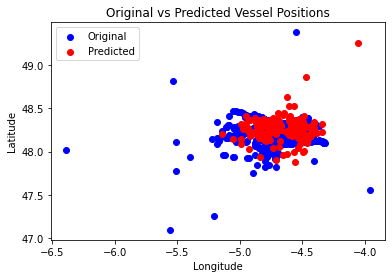

In [24]:
# Scatter plot
plt.scatter(o_geo_df['Longitude'], o_geo_df['Latitude'], color="blue", label='Original')
plt.scatter(geo_df['Longitude'], geo_df['Latitude'], color="red", label='Predicted')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Original vs Predicted Vessel Positions')

# Add legend
plt.legend()

# Show the plot
plt.show()

# MODEL EVALUATION

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
# Calculate prediction errors
lon_errors = y_test['lon1'] - lon_predictions
lat_errors = y_test['lat1'] - lat_predictions

o_lon_errors = y_test['lon1'] - original_lon1
o_lat_errors = y_test['lat1'] - original_lat1

# Calculate standard deviation of errors
lon_std_dev = np.std(lon_errors)
lat_std_dev = np.std(lat_errors)

o_lon_std_dev = np.std(o_lon_errors)
o_lat_std_dev = np.std(o_lat_errors)

In [27]:
print(f"Longitude Standard Deviation: {lon_std_dev}")
print(f"Latitude Standard Deviation: {lat_std_dev}")
print(f"Original Longitude Standard Deviation: {o_lon_std_dev}")
print(f"Original Latitude Standard Deviation: {o_lat_std_dev}")

Longitude Standard Deviation: 0.20115755321493933
Latitude Standard Deviation: 0.1888927834521122
Original Longitude Standard Deviation: 0.0
Original Latitude Standard Deviation: 0.0


In [28]:
#Calculate Mean Squared Error.

lon_mse = mean_squared_error(y_test['lon1'], lon_predictions)
lat_mse = mean_squared_error(y_test['lat1'], lat_predictions)
print(f"Longitude MSE: {lon_mse}")
print(f"Latitude MSE: {lat_mse}")

Longitude MSE: 0.041872191894992784
Latitude MSE: 0.035681731976987215


In [39]:
import math

#RMSE evaluation
#calculate Mean Squared Error (MSE) for longitude and latitude
lon_mse = mean_squared_error(y_test['lon1'], lon_predictions)
lat_mse = mean_squared_error(y_test['lat1'], lat_predictions)

#calculate Root Mean Squared Error (RMSE) for longitude and latitude
lon_rmse = math.sqrt(lon_mse)
lat_rmse = math.sqrt(lat_mse)

print(f"Longitude RMSE: {lon_rmse}")
print(f"Latitude RMSE: {lat_rmse}")


Longitude RMSE: 0.20462695788921065
Latitude RMSE: 0.18889608777575892


In [40]:
#Calculate MAE (Mean Absolute Error)

lon_mae = mean_absolute_error(y_test['lon1'], lon_predictions)
lat_mae = mean_absolute_error(y_test['lat1'], lat_predictions)

print(f"Longitude MAE: {lon_mae}")
print(f"Latitude MAE: {lat_mae}")

Longitude MAE: 0.1366523812797928
Latitude MAE: 0.1256393667129517


In [44]:
#R-squared evaluation
lon_r2 = r2_score(y_test['lon1'], lon_predictions)
lat_r2 = r2_score(y_test['lat1'], lat_predictions)

print(f"Longitude R-squared: {lon_r2}")
print(f"Latitude R-squared: {lat_r2}")

Longitude R-squared: -0.08307020681316835
Latitude R-squared: -0.38533862656986817


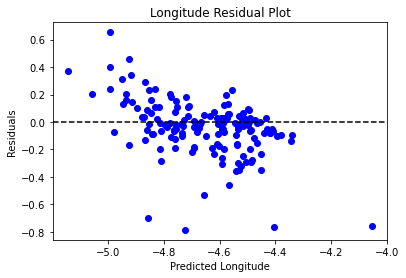

In [45]:
lon_residuals = y_test['lon1'] - lon_predictions

plt.scatter(lon_predictions, lon_residuals, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Longitude')
plt.ylabel('Residuals')
plt.title('Longitude Residual Plot')
plt.show()

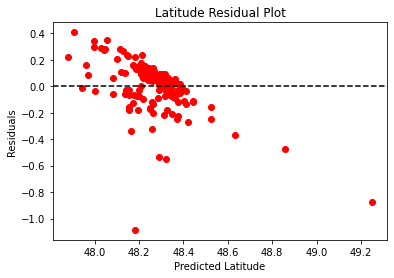

In [46]:
lat_residuals = y_test['lat1'] - lat_predictions

plt.scatter(lat_predictions, lat_residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Latitude')
plt.ylabel('Residuals')
plt.title('Latitude Residual Plot')
plt.show()